# 1. Introduction
In this notebook, we will explore the solution and analysis of predicting survival on the Titanic. The objective of this project is to utilize the available information about passengers aboard the Titanic to determine if they survived or not. Our goal is to train a machine learning model that can learn the patterns and connections between passenger characteristics and their survival outcome. Subsequently, we will use this model to make survival predictions on unseen passenger data.

I'll use two dataset for my project and these dataset are available at Kaggle.The two datasets are:
  1. Training set
  2. Test Set
  3. Submission Set
  
## Training Set
This dataset will serve as the foundation for conducting data manipulation and analysis to uncover valuable insights and construct a predictive model. Our objective is to identify and generate features that will aid us in predicting the outcome of the data. Machine learning problems can be categorized into two types: regression and classification. The Titanic dataset exemplifies a classification problem since the outcome is categorical, requiring our model to classify or predict whether a passenger survived or did not survive.

To summarize, we will utilize this dataset to extract insights, engineer relevant features, and develop a classification model to predict the survival outcome of Titanic passengers.

## Test Set
After constructing our model, it is crucial to assess its performance not only on the training set but also on unseen data, known as the testing set. The testing set will be utilized as input for our developed model, enabling us to make predictions based on these inputs. This evaluation on out-of-sample data ensures that our model generalizes well and is capable of making accurate predictions on data it hasn't been previously exposed to.


# 2. Importing Libraries

In [1]:
#data wrangling
import pandas as pd
import numpy as np
import missingno
from collections import Counter

#data visualisation
import seaborn as sns
import matplotlib.pyplot as plt

#machine learning models
from sklearn.linear_model import SGDClassifier, Perceptron, LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier

#model evalution - we'll use it to evaluate ur model
from sklearn.model_selection import cross_val_score

#hyperparameter tuning
from sklearn.model_selection import GridSearchCV

#removing warning
import warnings
warnings.filterwarnings("ignore")

# 3. Import and Read Data


In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
ss = pd.read_csv('gender_submission.csv')

Let's have a look at the datasets

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
print(f"Shape of train set: {train.shape}")
print(f"Shape of test set : {test.shape}")

Shape of train set: (891, 12)
Shape of test set : (418, 11)


Note that the test set has one column less than training set, the Survived column. This is because Survived is our response variable or target variable. We'll analyse data in training set and predict the survival of the passenger in the test set.

In [6]:
ss.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [7]:
ss.shape

(418, 2)

# 3. Data Description
Here I will outline the definitions of the columns in the titanic dataset. You can find this information under the data tab of the competition page.

* Survived: 0 = Did not survive, 1 = Survived

* Pclass: Ticket class where 1 = First class, 2 = Second class, 3 = Third class. This can also be seen as a proxy for socio-economic status.

* Sex: Male or female

* Age: Age in years, fractional if less than 1

* SibSp: Number of siblings or spouses aboard the titanic

* Parch: Number of parents or children aboard the titanic

* Ticket: Passenger ticket number

* Fare: Passenger fare

* Cabin: Cabin number

* Embarked: Point of embarkation where C = Cherbourg, Q = Queenstown, S = Southampton

**Github - https://github.com/chongjason914/kaggle-titanic/blob/main/titanic-tutorial.ipynb**

# 5.Exploratory Data Analysis(EDA)
EDA is a process of visualising and analysing data to extract insights. In other words, we want to summarise important characterstics and trends in our data in order to gain a better understanding of our dataset.

## 5.1 Data types, missing data and summary statistics

In [8]:
# Step 1 - Non null count and data types of the training and test set
train.info()
print('-x-'*15)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
-x--x--x--x--x--x--x--x--x--x--x--x--x--x--x-
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pass

In [9]:
# Compute missing data in training set by columns
train.isnull().sum().sort_values(ascending= False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [10]:
# Compute missing data in test set by columns
test.isnull().sum().sort_values(ascending = False)

Cabin          327
Age             86
Fare             1
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64

Age, Cabin and Embarked columns in the training set have missing data while Age, Fare and Cabin in the test set have missing data. Another way to diagnose this is via the missingno library

The "missingno" module in Python is a library that provides a set of tools and visualizations to analyze and visualize missing data in a dataset. It offers various functions and plots to understand the patterns and distribution of missing values in a dataset.

The "missingno" module provides several useful functions, including:

* **missingno.matrix**: This function creates a matrix visualization where missing values are represented by white lines, allowing you to quickly identify the locations of missing data in your dataset.

* **missingno.bar**: This function generates a bar plot showing the number or percentage of missing values in each variable, helping you assess the extent of missingness across different features.

* **missingno.heatmap**: This function produces a heatmap that visualizes the correlation between missing values in different variables. It helps identify if the missingness in one variable is related to the missingness in other variables.

<AxesSubplot:>

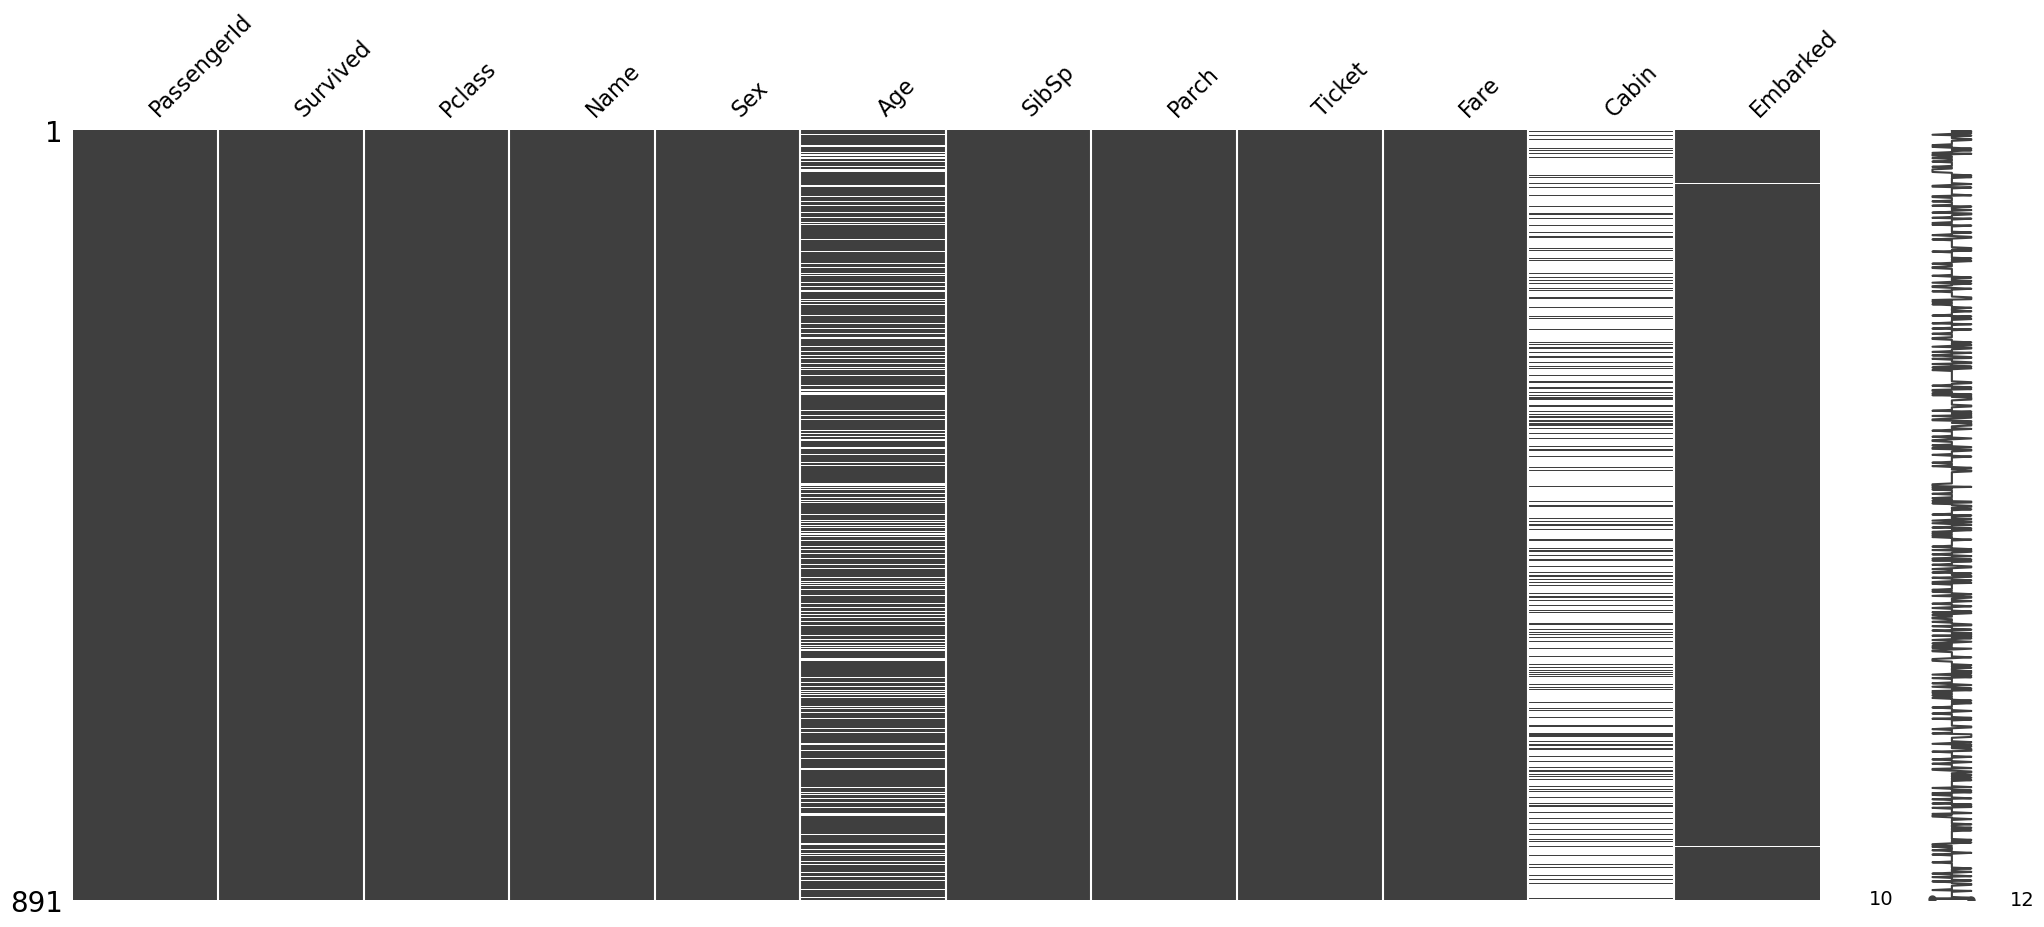

In [11]:
#missing data in training set

missingno.matrix(train)

<AxesSubplot:>

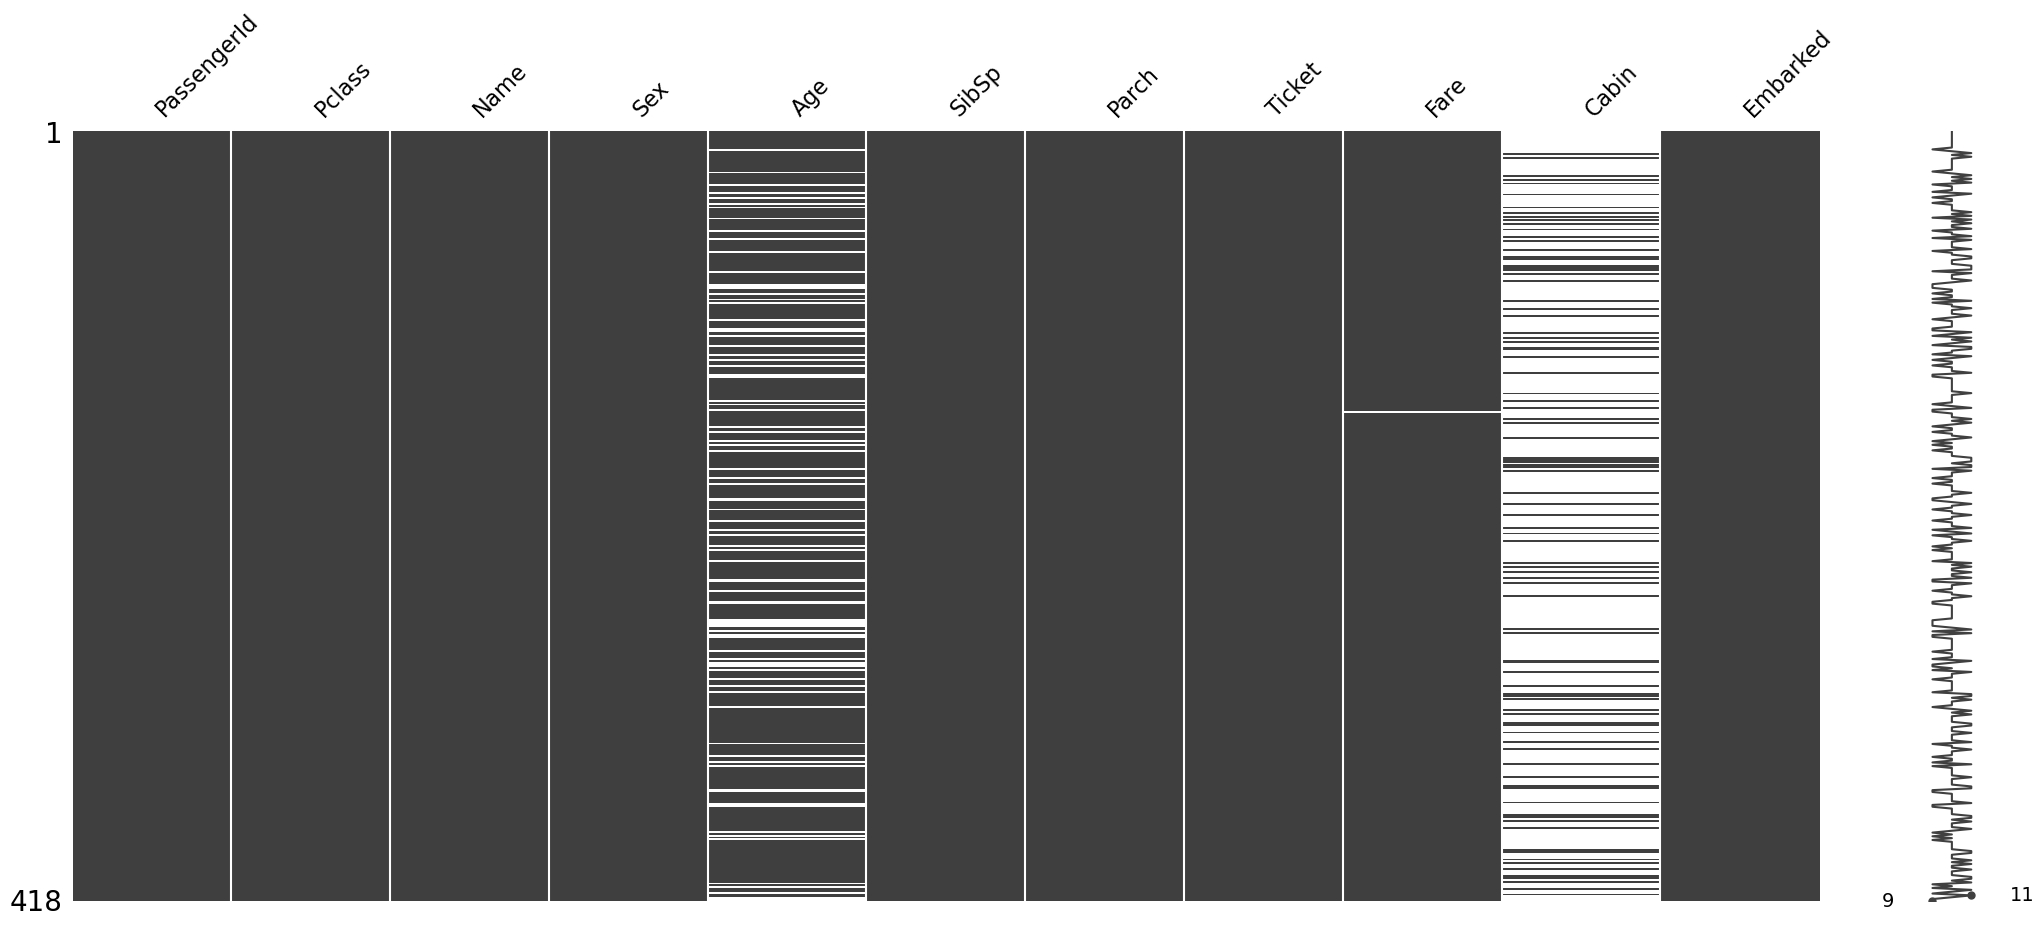

In [12]:
# missing values of test dataset

missingno.matrix(test)

In [13]:
# summary of the training dataset
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
# summary of the test dataset
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## 5.2 Feature Analysis
A dataframe is made up of rows and columns. Number of rows correspond to the number of observations in our dataset whereas columns, sometimes called features, represent characterstics that help describe thses observations. In our dataset, rows are te passengers on the titanic whereas columns are the features that describe the passengers like their age, gender etc.

Categorical variables, as the name suggests, have values belonging to one of two or more categories and there is usually no intrinsic oredering to these categories. An example of this in our dataset is Sex feature. Every passenger is distinctly classified as male or female. Numerical data on the other hand, have continuous distribution. Examples are Age and Fare features.

Knowing if a feature is numerical variable or categorical variable helps us structure our analysis more properly. For instance , it doesn't make sense to calculate the average of a categorical variable such as gender simply because gender is a binary classification and therefore has no intrinsic ordering to its values.

###  5.2.1 Categorical Variables
Categorical variables in our dataset are Sex, Pclass and Embarked

### Categorical Variable : Sex
The **value_counts()** function in pandas is a method used to count the occurrence of unique values in a specific column of a DataFrame. It returns a new Series object with the unique values as the index and their respective counts as the values.

In [15]:
# Value counts of the sex column

train['Sex'].value_counts(dropna = False)
#Comment: There are more male passengers than female

male      577
female    314
Name: Sex, dtype: int64

In [16]:
# mean of survival by sex
train[['Sex','Survived']].groupby('Sex',as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


Text(0.5, 0, 'Survival Probability by Gender')

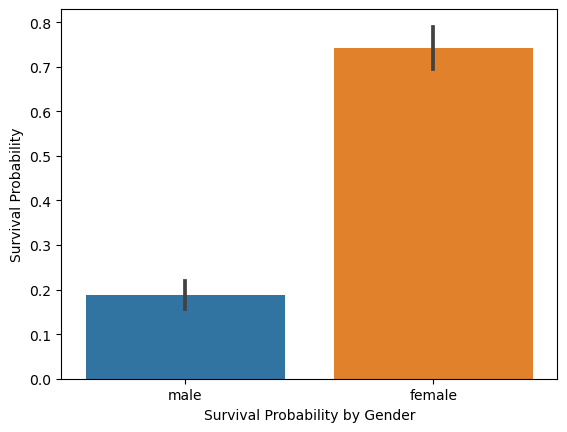

In [17]:
sns.barplot(x = 'Sex', y = 'Survived', data = train)
plt.ylabel("Survival Probability")
plt.xlabel("Survival Probability by Gender")


### Categorical Variable: Pclass

In [18]:
# value count of Pclass column
train['Pclass'].value_counts(dropna=False)

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [19]:
# mean of survival by Pclass
train[['Pclass','Survived']].groupby('Pclass',as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Text(0.5, 0, 'Survival Probability by gender')

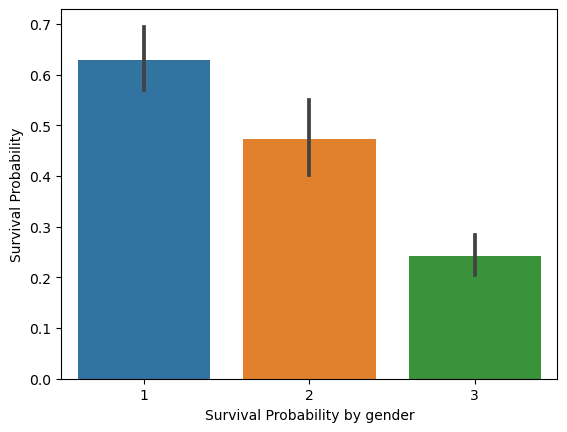

In [20]:
#plotting the above thing
sns.barplot(x='Pclass', y='Survived', data = train)
plt.ylabel("Survival Probability")
plt.xlabel("Survival Probability by gender")

Text(0.5, 1.0, 'Survival Probability by gender and passenger class')

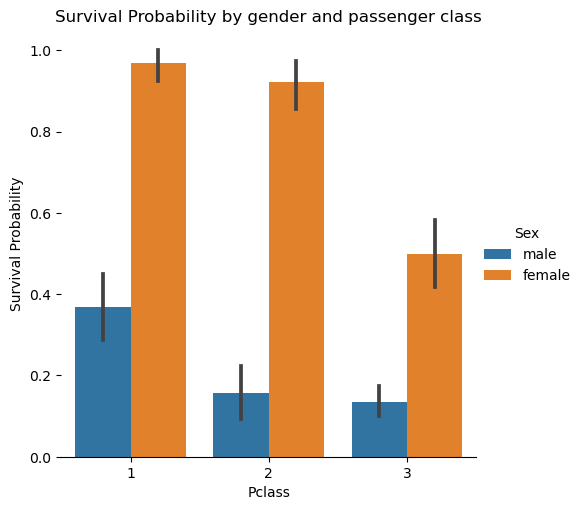

In [21]:
#survival by gender and passenger class

g= sns.factorplot(x='Pclass', y='Survived', hue = 'Sex', data = train, kind = 'bar')
g.despine(left = True)
plt.ylabel("Survival Probability")
plt.title("Survival Probability by gender and passenger class")

### Categorical Variable: Embarked


In [22]:
# value count of embarked
train['Embarked'].value_counts(dropna = False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [23]:
# mean of survival by Embarked

train[['Embarked','Survived']].groupby(['Embarked'], as_index = False).mean().sort_values(by = 'Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


Text(0.5, 1.0, 'Survival Probability by Point of Embarkation')

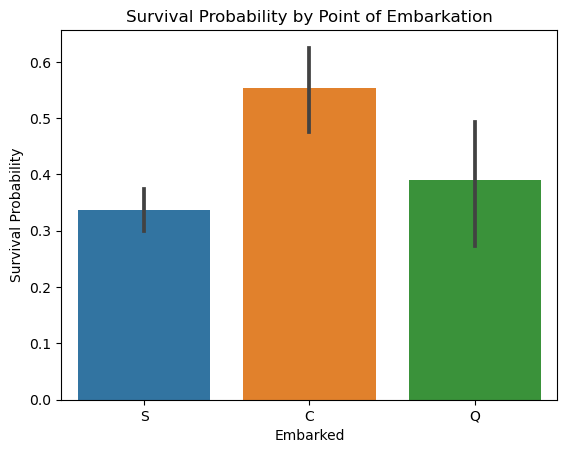

In [24]:
sns.barplot(x='Embarked', y='Survived', data = train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Point of Embarkation')

Survival probibility is highest for location C and lowest for location S. Is there a reason for this occurence?

We can provide a hypothesis whereby the majority of the first class passenger have embarked from location C and because they have the highest survival probability, this has resulted in location C having a highest survival probablity.Alternatively, there could have been more third class passengers that embarked from the location S and because they have lowest survival probability, this has caused lowest survival probability 

Let's test our hypothesis

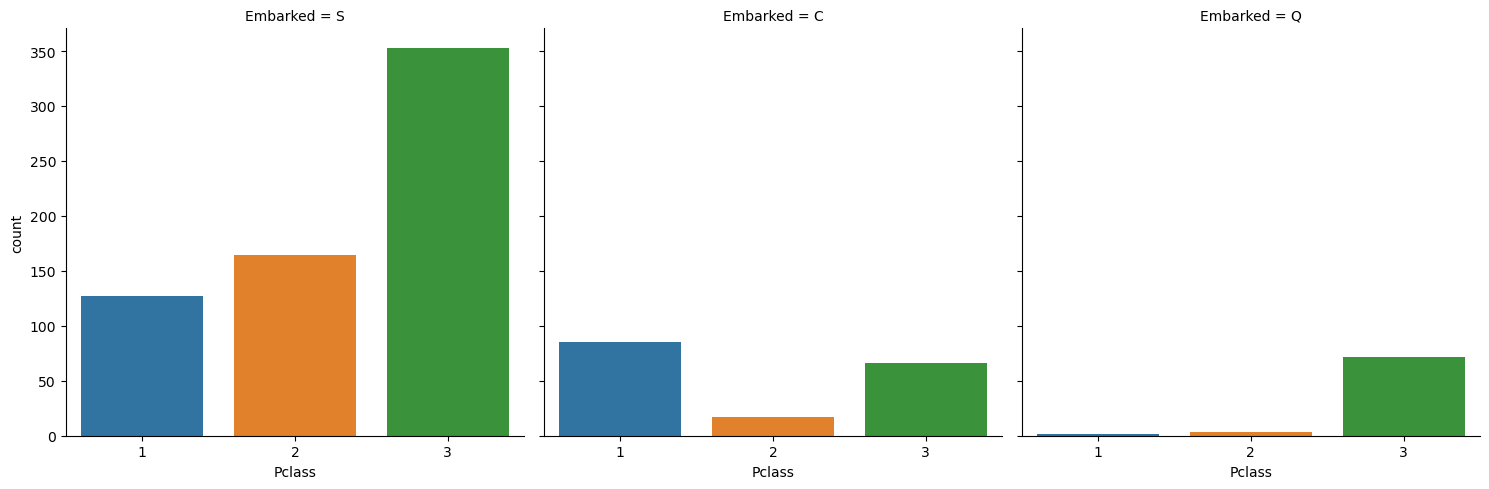

In [25]:
sns.factorplot('Pclass', col = 'Embarked', data = train, kind = 'count')

Our hypothesis appears to be true. Location S has the most third class passengers whereas location C has the most first class passengers.

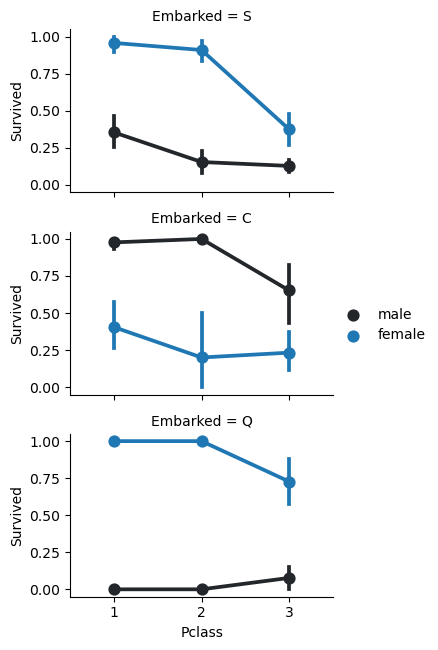

In [26]:
# survival probiblity by all categorical variables
grid = sns.FacetGrid(train, row = 'Embarked', size = 2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', pallete = 'deep')
grid.add_legend()

### 5.2.2 Numerical Variables
Numerical variable in our dataset are SibSp, Parch, Age and Fare

### Detect and remove outliers in numerical variables
Outliers are data points that have extreme values and they do not conform with the majority of the data. It is important to address this because outliers tend to skew our data towards extremes and can cause inaccurate model predictions. I will use the Turkey method to remove outliers.

Outliers are data points that significantly deviate from the majority of the observations in a dataset. They are values that are extremely high or low compared to the other values in the same feature. Outliers can arise due to various reasons such as measurement errors, data entry mistakes, or genuine rare events.

The provided function, detect_outliers, aims to identify outliers in a dataset for a given set of features. Here is an explanation of how the function works:

* The function takes three arguments: df (the DataFrame containing the data), n (the threshold for outlier frequency), and features (a list of features to check for outliers).

* The function initializes an empty list called outlier_indices, which will store the indices of the detected outliers.

* For each feature specified in the features list, the function performs the following steps:

* Calculate the first quartile (Q1), third quartile (Q3), and interquartile range (IQR) for the feature.
* Define the outlier step as 1.5 times the IQR.
* Identify the indices of the data points that fall below Q1 - outlier_step or above Q3 + outlier_step. These indices represent the outliers for the current feature.
* Extend the outlier_indices list with the newly found outlier indices.
* After iterating through all the specified features, the outlier_indices list contains all the indices of the detected outliers.

* The function uses the Counter class from the collections module to count the frequencies of the outlier indices.

* Finally, the function filters the outlier indices by checking if their frequency (value) exceeds the specified threshold n. The indices that meet this criterion are stored in the multiple_outliers list.

* The function returns the multiple_outliers list, which contains the indices of the outliers that appeared more than n times across the specified features.

By using this function, you can identify and examine the data points that are considered outliers based on the specified features and threshold.

First Quartile (Q1): The first quartile, also known as the lower quartile, is the value that separates the lowest 25% of the data from the rest. In other words, it is the value below which approximately 25% of the observations lie. It is denoted as Q1.

Third Quartile (Q3): The third quartile, also known as the upper quartile, is the value that separates the highest 25% of the data from the rest. It represents the value below which approximately 75% of the observations lie. It is denoted as Q3.

Interquartile Range (IQR): The interquartile range is the range between the first quartile (Q1) and the third quartile (Q3). It measures the spread or dispersion of the middle 50% of the data. Mathematically, it is calculated as IQR = Q3 - Q1.

The interquartile range is often used to identify potential outliers. Values that fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR are considered outliers and may be subject to further investigation.

In [27]:
def detect_outliers(df, n, features):
    """"
    This function will loop through a list of features and detect outliers in each one of those features. In each
    loop, a data point is deemed an outlier if it is less than the first quartile minus the outlier step or exceeds
    third quartile plus the outlier step. The outlier step is defined as 1.5 times the interquartile range. Once the 
    outliers have been determined for one feature, their indices will be stored in a list before proceeding to the next
    feature and the process repeats until the very last feature is completed. Finally, using the list with outlier 
    indices, we will count the frequencies of the index numbers and return them if their frequency exceeds n times.    
    """
    outlier_indices = [] 
    for col in features: 
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR 
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col) 
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(key for key, value in outlier_indices.items() if value > n) 
    return multiple_outliers

outliers_to_drop = detect_outliers(train, 2, ['Age', 'SibSp', 'Parch', 'Fare'])
print("We will drop these {} indices: ".format(len(outliers_to_drop)), outliers_to_drop)

We will drop these 10 indices:  [27, 88, 159, 180, 201, 324, 341, 792, 846, 863]


In [28]:
#outliers in numerical variables
train.loc[outliers_to_drop,:]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [29]:
#drop outliers and reset the index
print(f"Before: {len(train)} rows")
train = train.drop(outliers_to_drop,axis = 0).reset_index(drop = True)
print(f"After: {len(train)} rows")

Before: 891 rows
After: 881 rows


## Numerical variables correlation with survival

<AxesSubplot:>

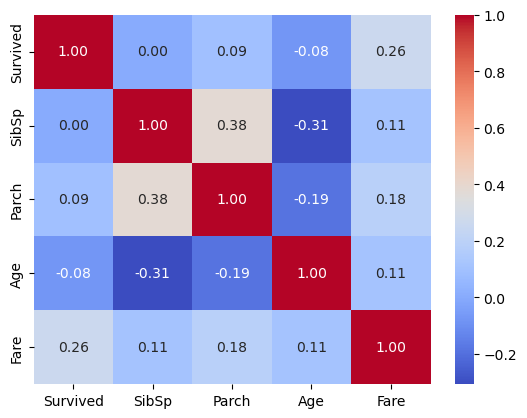

In [30]:
sns.heatmap(train[['Survived','SibSp','Parch','Age','Fare']].corr(), annot=True, fmt = '.2f',cmap = 'coolwarm')

### Numerical Variable: SibSp

In [31]:
# value counts of the SibSp column
train['SibSp'].value_counts(dropna = False)

0    608
1    209
2     28
4     18
3     13
5      5
Name: SibSp, dtype: int64

In [32]:
# mean of survival by SibSp
train[['SibSp','Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
4,4,0.166667
3,3,0.153846
5,5,0.000000


Text(0.5, 1.0, 'Survival Probability by SibSp')

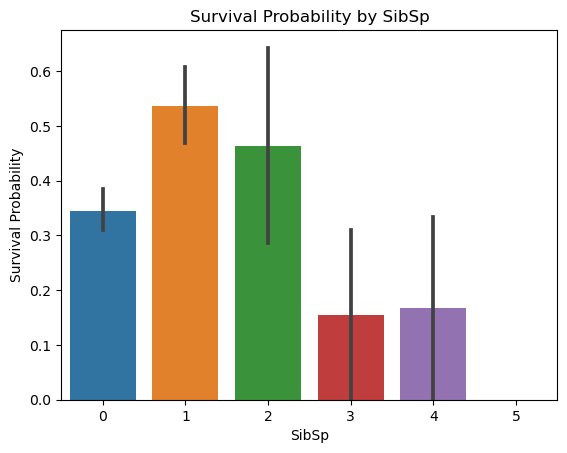

In [33]:
sns.barplot(x = 'SibSp', y = 'Survived', data = train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by SibSp')

### Numerical Variable: Parch

In [34]:
# value count of Parch
train['Parch'].value_counts(dropna = False)

0    678
1    118
2     70
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [35]:
# mean of surviva by Parch
train[['Parch','Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.542857
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


Text(0.5, 1.0, 'Survival Probability by Parch')

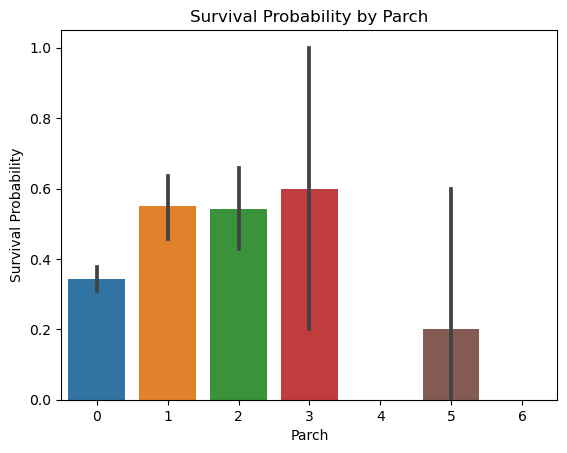

In [36]:
sns.barplot(x='Parch', y='Survived', data = train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Parch')

### Numerical Variable: Age

In [37]:
# null values in Age column
train['Age'].isnull().sum()

170

Text(0.5, 1.0, 'Passenger Age Distribution')

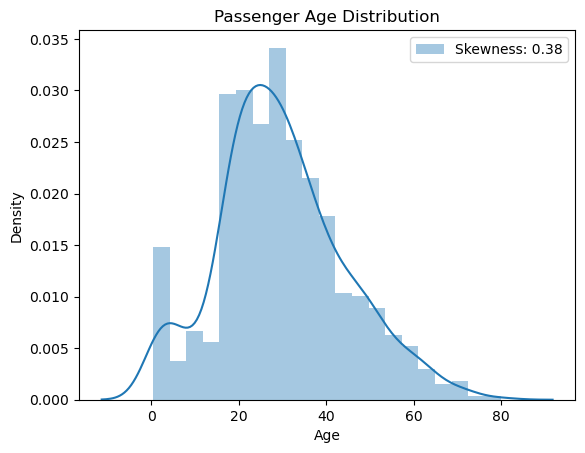

In [38]:
# Passenger age distribution
sns.distplot(train['Age'], label = 'Skewness: %.2f'%(train['Age'].skew()))
plt.legend(loc = 'best')
plt.title('Passenger Age Distribution')

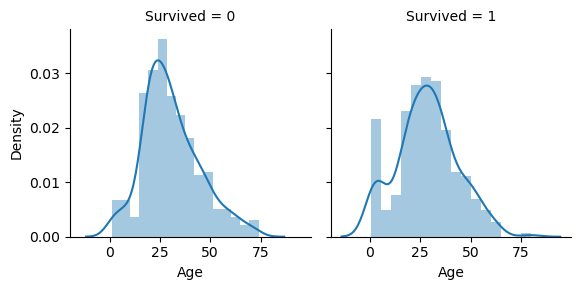

In [39]:
#age distribution by survival
g = sns.FacetGrid(train, col = 'Survived')
g.map(sns.distplot,'Age')

Text(0.5, 1.0, 'Passenger Age Distribution by Survival')

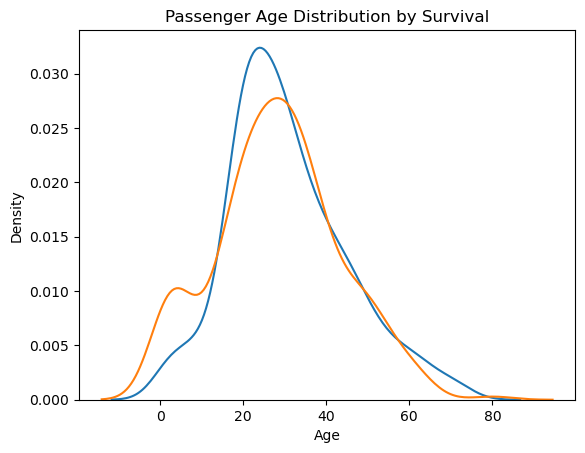

In [40]:
sns.kdeplot(train['Age'][train['Survived']==0],label = 'Did Not Survive')
sns.kdeplot(train['Age'][train['Survived']==1],label = 'Survived')
plt.xlabel("Age")
plt.title('Passenger Age Distribution by Survival')

### Numerical Variable: Fare

In [41]:
# Null values of fare column
train['Fare'].isnull().sum()

0

Text(0, 0.5, 'Passenger Fare Distribution')

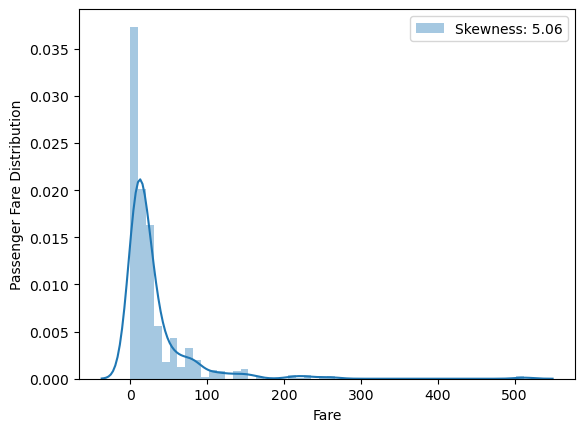

In [42]:
#passenger fare distibution
sns.distplot(train['Fare'], label = 'Skewness: %.2f'%(train['Fare'].skew()))
plt.legend(loc = 'best')
plt.ylabel('Passenger Fare Distribution')

Fare seems to have a high skewness.We will address this issue later on in the notebook via log transformation

# 6. Data Preprocessing
Data preprocessing is the process of getting our dataset ready for model training. In this section, we will perform the following preprocessing steps: 
* Drop and fill missing values
* Data transformation(logarithmic transformation)
* Feature Engineering
* Feature Encoding

### 6.1 Drop and fill missing values

In [43]:
# Drop ticket and cabin features from training and test set
train = train.drop(['Ticket','Cabin'], axis = 1)
test = test.drop(['Ticket','Cabin'], axis = 1)

In [44]:
#missing values in training set
train.isnull().sum().sort_values(ascending = False)

Age            170
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Fare             0
dtype: int64

In [45]:
# Compute the most frequent value of Embarked in training set
mode = train['Embarked'].dropna().mode()[0]
mode

'S'

In [46]:
# Fill missing value in Embarked with mode
train['Embarked'].fillna(mode, inplace = True)

In [47]:
#missing values in test set 
test.isnull().sum().sort_values(ascending=False)

Age            86
Fare            1
PassengerId     0
Pclass          0
Name            0
Sex             0
SibSp           0
Parch           0
Embarked        0
dtype: int64

In [48]:
#compute median of Fare in test set
median = test['Fare'].dropna().median()
median

14.4542

In [49]:
#fill the missing values of Fare in test with the median
test['Fare'].fillna(median,inplace=True)

In [50]:
#combining training set and testing set
combine = pd.concat([train,test],axis = 0).reset_index(drop = True)
combine.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [51]:
#missing values in the combined dataset
combine.isnull().sum().sort_values(ascending=False)

Survived       418
Age            256
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64

We can ignore missing values in the Survived column because all of them are from the test set. Now we need to fill missing values in the Age column.

The goal is to use features that are most correlated with Age to predict the values for Age. But first, we need to convert Sex into numerical values where 0 = male and 1 = female. This process is known as encoding and we will further explore this later in the notebook.

In [52]:
#converting Sex into numerical column by assigning  0 = male and 1 = female
combine['Sex'] = combine['Sex'].map({'male':0,'female':1})

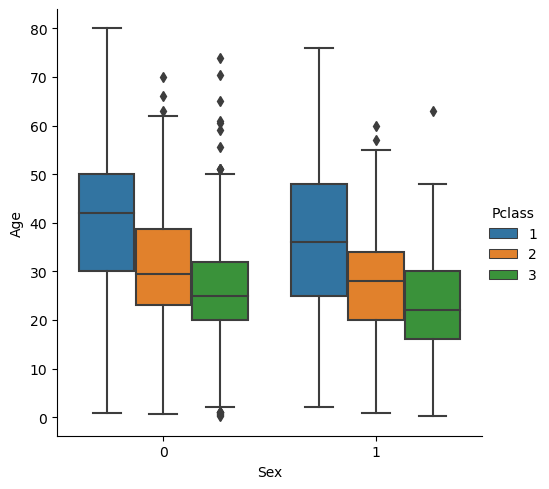

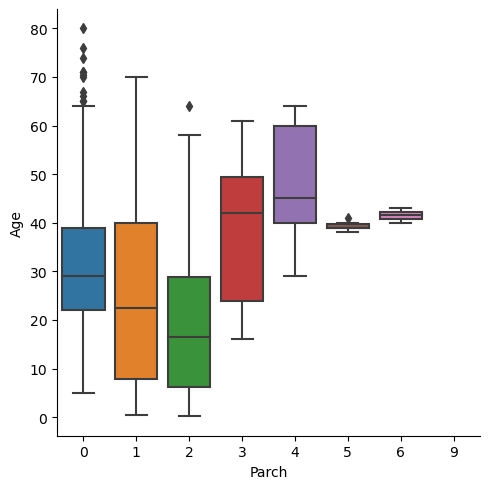

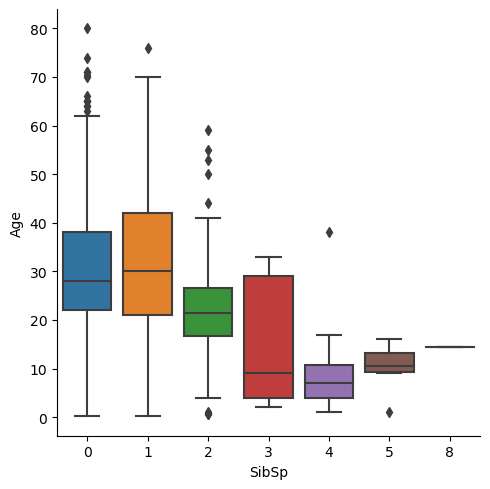

In [53]:
sns.factorplot(y='Age',x='Sex',hue='Pclass', kind = 'box',data=combine)
sns.factorplot(y='Age',x='Parch', kind = 'box',data=combine)
sns.factorplot(y='Age',x='SibSp', kind = 'box',data=combine)

<AxesSubplot:>

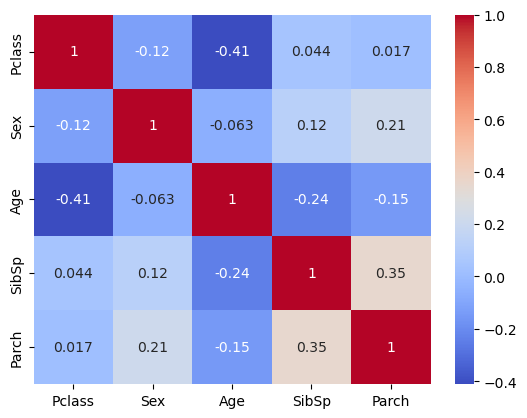

In [54]:
sns.heatmap(combine.drop(['Survived','Name','PassengerId','Fare'],axis=1).corr(), annot = True, cmap = 'coolwarm')

Age is not correlated with Sex but is negatively correlated with SibSp,Parch and Pclass.


In [55]:
#check number of missing ages
age_nan_indices = list(combine[combine['Age'].isnull()].index)
len(age_nan_indices)

256

In [56]:
#loop through list and impute missing ages
for index in age_nan_indices:
    median_age = combine['Age'].median()
    predict_age = combine['Age'][(combine['SibSp'] == combine.iloc[index]['SibSp']) 
                                 & (combine['Parch'] == combine.iloc[index]['Parch']) 
                                 & (combine['Pclass'] == combine.iloc[index]['Pclass'])].median()
    if np.isnan(predict_age):
        combine['Age'].iloc[index] = median_age
    else:
        combine['Age'].iloc[index] = predict_age

In [57]:
#making sure there is no missing ages
combine['Age'].isnull().sum()

0

## 6.2 Data Transformation
Recall that our passenger fare column has a very high positiv skewness.Therefore, we will apply a log transformation to address this issue.

Text(0.5, 1.0, 'Passenger Fare Distribution')

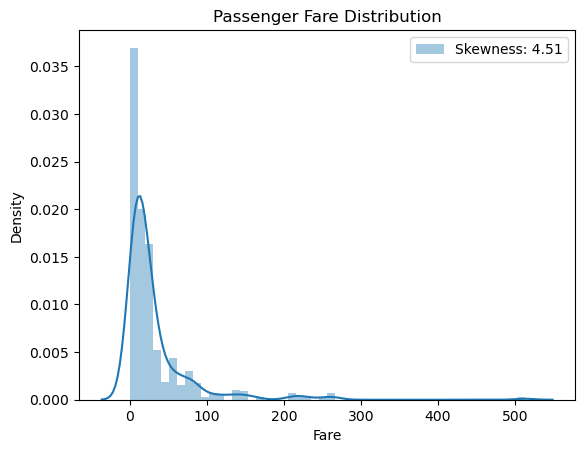

In [58]:
#Passenger fare distribution
sns.distplot(combine['Fare'], label = 'Skewness: %.2f'%(combine['Fare'].skew()))
plt.legend(loc = 'best')
plt.title('Passenger Fare Distribution')

In [59]:
#apply log transformation to fare column to reduce skewness
combine['Fare'] = combine['Fare'].map(lambda x: np.log(x) if x > 0 else 0)

Text(0.5, 1.0, 'Passenger Fare Distribution After Log Transformation')

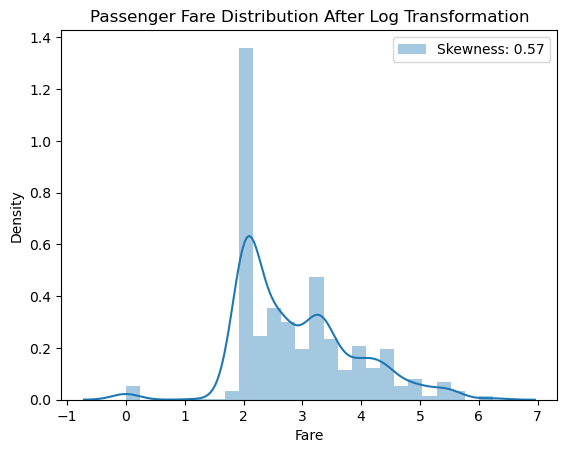

In [60]:
# Passenger fare distribution after log transformation

sns.distplot(combine['Fare'], label = 'Skewness: %.2f'%(combine['Fare'].skew()))
plt.legend(loc = 'best')
plt.title('Passenger Fare Distribution After Log Transformation')

## 6.3 Features Engineering
Feature engineering is arguably the most important art in machine learning. It is the process of creating new feature from existing to better represent the underlying problem to the predictive models resulting in improved model accuracy on unseen data.

In this section, I will construct 3 new features:
* Title
* IsAlone
* Age*Class

## 6.3.1 Title

In [61]:
combine.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,1.981001,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,4.266662,C
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,2.070022,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,3.972177,S
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,2.085672,S


In [62]:
#getting title from name
combine['Title'] = [name.split(',')[1].split('.')[0].strip() for name in combine['Name']]
combine[['Name','Title']].head()

,Name,Title
0,"Braund, Mr. Owen Harris",Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
2,"Heikkinen, Miss. Laina",Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,"Allen, Mr. William Henry",Mr


In [63]:
# number if unique Title
combine['Title'].nunique()

18

In [64]:
# simplify title
combine['Title'] = combine['Title'].replace(['Dr','Rev','Col','Major','Lady','Jonkeer','Don','Capt','the Countess',
                                            'Sir','Dona'],'Rare')
combine['Title'] = combine['Title'].replace(['Mlle','Ms'], 'Miss')
combine['Title'] = combine['Title'].replace('Mme','Mrs')

<AxesSubplot:xlabel='Title', ylabel='count'>

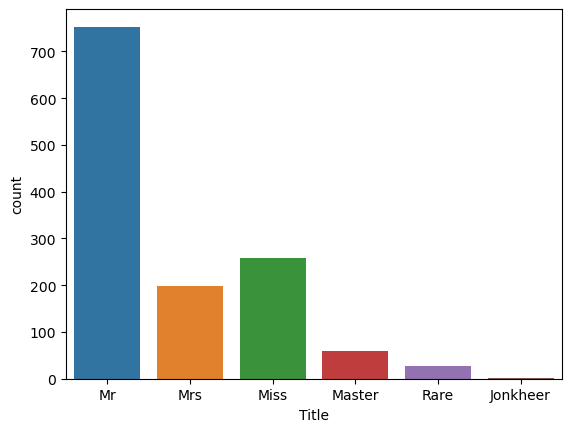

In [65]:
sns.countplot(combine['Title'])

In [66]:
#mean of survival by name title
combine[['Title','Survived']].groupby(['Title'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Title,Survived
4,Mrs,0.793651
2,Miss,0.711111
1,Master,0.589744
5,Rare,0.363636
3,Mr,0.157895
0,Jonkheer,0.000000


Text(0.5, 1.0, 'Survival Probability by Title')

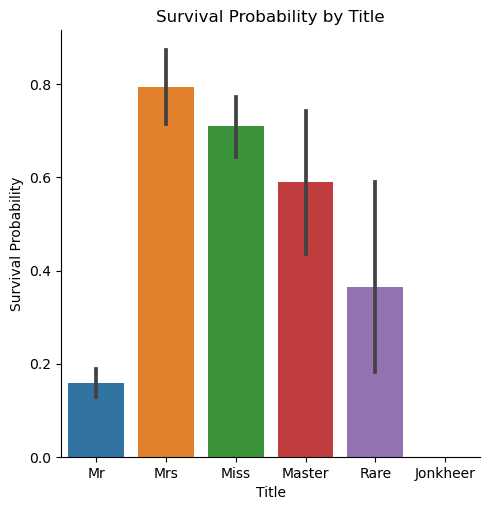

In [67]:
sns.factorplot(x='Title', y='Survived', data = combine, kind = 'bar')
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Title')

In [68]:
#drop name column 
combine = combine.drop('Name',axis=1)
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0.0,3,0,22.0,1,0,1.981001,S,Mr
1,2,1.0,1,1,38.0,1,0,4.266662,C,Mrs
2,3,1.0,3,1,26.0,0,0,2.070022,S,Miss
3,4,1.0,1,1,35.0,1,0,3.972177,S,Mrs
4,5,0.0,3,0,35.0,0,0,2.085672,S,Mr


## 6.3.2 IsAlone

In [69]:
#calculate family size from SibSp and Parch
combine['FamilySize'] = combine['SibSp'] + combine['Parch'] + 1
combine[['SibSp','Parch','FamilySize']].head(10)

,SibSp,Parch,FamilySize
0,1,0,2
1,1,0,2
2,0,0,1
3,1,0,2
4,0,0,1
5,0,0,1
6,0,0,1
7,3,1,5
8,0,2,3
9,1,0,2


In [70]:
#mean of survival by family size
combine[['FamilySize','Survived']].groupby(['FamilySize'], as_index = False).mean().sort_values(by = 'Survived',ascending = False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.052632
7,8,0.000000
8,11,NaN


In [71]:
#creating IsAlone feature
combine['IsAlone'] = 0
combine.loc[combine['FamilySize'] == 1,'IsAlone'] = 1

In [72]:
#mean of survival by IsAlone
combine[['IsAlone','Survived']].groupby('IsAlone',as_index = False).mean().sort_values(by='Survived',ascending=False)

,IsAlone,Survived
0,0,0.514535
1,1,0.303538


In [73]:
#drop SibSp, Parch, and FamilySize column from combine df
combine = combine.drop(['SibSp','Parch','FamilySize'], axis = 1)
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,1,0.0,3,0,22.0,1.981001,S,Mr,0
1,2,1.0,1,1,38.0,4.266662,C,Mrs,0
2,3,1.0,3,1,26.0,2.070022,S,Miss,1
3,4,1.0,1,1,35.0,3.972177,S,Mrs,0
4,5,0.0,3,0,35.0,2.085672,S,Mr,1


## 6.3.3 Age*Class
To create our Age*Class feature, we need to first transform Age into an ordinal variable. Ordinal Variable is much like a categorical variable but with intrinsic ordering in their values

We will group Ages into 5 separate age bands and assign a number to each age band.

In [74]:
# create age bands and compute mean of survival by age bands
combine['AgeBand'] = pd.cut(combine['Age'],5)
combine[['AgeBand','Survived']].groupby(['AgeBand'],as_index = False).mean().sort_values(by = 'AgeBand')

,AgeBand,Survived
0,"(0.0902, 16.136]",0.532110
1,"(16.136, 32.102]",0.339662
2,"(32.102, 48.068]",0.412844
3,"(48.068, 64.034]",0.434783
4,"(64.034, 80.0]",0.090909


In [75]:
#assign ordinals to each age band 
combine.loc[combine['Age'] <= 16.136, 'Age'] = 0
combine.loc[(combine['Age'] > 16.136) & (combine['Age'] <= 32.102), 'Age'] = 1
combine.loc[(combine['Age'] > 32.102) & (combine['Age'] <= 48.068), 'Age'] = 2
combine.loc[(combine['Age'] > 48.068) & (combine['Age'] <= 64.034),'Age'] = 3
combine.loc[combine['Age'] > 64.034, 'Age'] = 4

In [76]:
#drop age band feature
combine = combine.drop('AgeBand', axis = 1)

In [77]:
#age and Pclass data type
combine[['Age','Pclass']].dtypes

Age       float64
Pclass      int64
dtype: object

In [78]:
#convert ordinal age into integer
combine['Age'] = combine['Age'].astype('int')
combine['Age'].dtype

dtype('int32')

In [79]:
#create Age*Class feature
combine['Age*Class'] = combine['Age']*combine['Pclass']
combine[['Age','Pclass','Age*Class']].head()

,Age,Pclass,Age*Class
0,1,3,3
1,2,1,2
2,1,3,3
3,2,1,2
4,2,3,6


## 6.4 Feature Encoding
Machine Learning models require all input and output variables to be numeric. Therefore, we need to encode all of our categorical data before we can fit the models to our data.

Previously,we have encoded the sex column such that 0 = male and 1 = female. We need to repeat this process for Title and Embarked. In addition, similar to the age column, I will also transform Fare into an ordinal variable rather than continuous variable.

In [80]:
combine.head() 

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,1,0.0,3,0,1,1.981001,S,Mr,0,3
1,2,1.0,1,1,2,4.266662,C,Mrs,0,2
2,3,1.0,3,1,1,2.070022,S,Miss,1,3
3,4,1.0,1,1,2,3.972177,S,Mrs,0,2
4,5,0.0,3,0,2,2.085672,S,Mr,1,6


In [81]:
#Encode Title and Embarked feature

combine = pd.get_dummies(combine, columns = ['Title'])
combine = pd.get_dummies(combine, columns = ['Embarked'], prefix = 'Em')
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Jonkheer,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,1,0.0,3,0,1,1.981001,0,3,0,0,0,1,0,0,0,0,1
1,2,1.0,1,1,2,4.266662,0,2,0,0,0,0,1,0,1,0,0
2,3,1.0,3,1,1,2.070022,1,3,0,0,1,0,0,0,0,0,1
3,4,1.0,1,1,2,3.972177,0,2,0,0,0,0,1,0,0,0,1
4,5,0.0,3,0,2,2.085672,1,6,0,0,0,1,0,0,0,0,1


In [82]:
# Divide Fare into four bands
combine['FareBand'] = pd.cut(combine['Fare'], 4)
combine[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by = 'FareBand')

,FareBand,Survived
0,"(-0.00624, 1.56]",0.062500
1,"(1.56, 3.119]",0.288719
2,"(3.119, 4.679]",0.517007
3,"(4.679, 6.239]",0.750000


In [83]:
# Assign ordinal to each fare band
combine.loc[combine['Fare'] <= 1.56, 'Fare'] = 0
combine.loc[(combine['Fare'] > 1.56) & (combine['Fare'] <= 3.119), 'Fare'] = 1
combine.loc[(combine['Fare'] > 3.119) & (combine['Fare'] <= 4.679), 'Fare'] = 2
combine.loc[combine['Fare'] > 4.679, 'Fare'] = 3

In [84]:
#convert fare into integer
combine['Fare'] = combine['Fare'].astype('int')

In [85]:
# drop FareBand feature
combine = combine.drop('FareBand', axis = 1)
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Jonkheer,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,1,0.0,3,0,1,1,0,3,0,0,0,1,0,0,0,0,1
1,2,1.0,1,1,2,2,0,2,0,0,0,0,1,0,1,0,0
2,3,1.0,3,1,1,1,1,3,0,0,1,0,0,0,0,0,1
3,4,1.0,1,1,2,2,0,2,0,0,0,0,1,0,0,0,1
4,5,0.0,3,0,2,1,1,6,0,0,0,1,0,0,0,0,1


In [86]:
#separate training and test set from the combined dataframe
train = combine[:len(train)]
test = combine[len(train):]

In [87]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Jonkheer,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,1,0.0,3,0,1,1,0,3,0,0,0,1,0,0,0,0,1
1,2,1.0,1,1,2,2,0,2,0,0,0,0,1,0,1,0,0
2,3,1.0,3,1,1,1,1,3,0,0,1,0,0,0,0,0,1
3,4,1.0,1,1,2,2,0,2,0,0,0,0,1,0,0,0,1
4,5,0.0,3,0,2,1,1,6,0,0,0,1,0,0,0,0,1


In [88]:
#drop passenger ID column from training set
train = train.drop('PassengerId', axis = 1)
train.head()

,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Jonkheer,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,0.0,3,0,1,1,0,3,0,0,0,1,0,0,0,0,1
1,1.0,1,1,2,2,0,2,0,0,0,0,1,0,1,0,0
2,1.0,3,1,1,1,1,3,0,0,1,0,0,0,0,0,1
3,1.0,1,1,2,2,0,2,0,0,0,0,1,0,0,0,1
4,0.0,3,0,2,1,1,6,0,0,0,1,0,0,0,0,1


In [89]:
#convert survived back to integer in the training set
train['Survived'] = train['Survived'].astype('int')
train.head()

,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Jonkheer,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,0,3,0,1,1,0,3,0,0,0,1,0,0,0,0,1
1,1,1,1,2,2,0,2,0,0,0,0,1,0,1,0,0
2,1,3,1,1,1,1,3,0,0,1,0,0,0,0,0,1
3,1,1,1,2,2,0,2,0,0,0,0,1,0,0,0,1
4,0,3,0,2,1,1,6,0,0,0,1,0,0,0,0,1


In [90]:
test.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Jonkheer,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
881,892,NaN,3,0,2,1,1,6,0,0,0,1,0,0,0,1,0
882,893,NaN,3,1,2,1,0,6,0,0,0,0,1,0,0,0,1
883,894,NaN,2,0,3,1,1,6,0,0,0,1,0,0,0,1,0
884,895,NaN,3,0,1,1,1,3,0,0,0,1,0,0,0,0,1
885,896,NaN,3,1,1,1,0,3,0,0,0,0,1,0,0,0,1


In [91]:
# drop PassengerId survived column from test set
test = test.drop('Survived', axis = 1)
test.head()

,PassengerId,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Jonkheer,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
881,892,3,0,2,1,1,6,0,0,0,1,0,0,0,1,0
882,893,3,1,2,1,0,6,0,0,0,0,1,0,0,0,1
883,894,2,0,3,1,1,6,0,0,0,1,0,0,0,1,0
884,895,3,0,1,1,1,3,0,0,0,1,0,0,0,0,1
885,896,3,1,1,1,0,3,0,0,0,0,1,0,0,0,1


Our Dataframe are ready for modelling!

# 7. Modelling

Scikit-learn is one of the most popular libraries for machine learning in Python and that is what we will use in modelling part of this project.

Since Titanic is a classification problem, we will need to use classification problem, we will need to use classification models, also known as classifiers, to train on our model to make predictions. I have chosen the following classifiers for the job:

* Logistic regression
* Support vector machines
* K-nearest neighbours
* Gaussian naive bayes
* Perceptron
* Linear SVC
* Stochastic gradient descent
* Decision tree
* Random forest
* CatBoost


In, this section of the notebook, I will fit the models to the training set as outlined above and evaluate their accuracy at making predictions. Once the best model is determined, I will also do hyperparameter tuning to further boost the performance of the best model.

## 7.1 Split training data 
We need to first split our training data into independent variables or predictor variables, represnted by X as well as dependent variables or response variable, represented by Y.

Y_train is the survived column in our training set and X_train is the other columns in the training se excluding the Survived column. Our models will learn to classify survival, Y_train based on all X_train and make predictions on X_test.

In [92]:
X_train = train.drop('Survived', axis = 1)
Y_train = train['Survived']
X_test = test.drop('PassengerId', axis = 1).copy()
print("X_train shape: ", X_train.shape)
print("Y_train shape: ", Y_train.shape)
print("X_test shape: ", X_test.shape)

X_train shape:  (881, 15)
Y_train shape:  (881,)
X_test shape:  (418, 15)


## 7.2 Fit model to data and make predictions
This requires 3 simple steps: instantiate the model, fit the model to the training set and predict the data in test set.

### 7.2.1 Logistic Regression

In [93]:
logreg = LogisticRegression()
logreg.fit(X_train,Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train)*100, 2)
acc_log

80.82

### 7.2.2 Support Vector machines

In [94]:
svc = SVC()
svc.fit(X_train,Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train,Y_train)*100, 2)
acc_svc

83.2

### 7.2.3 K-nearest neighbours (KNN)

In [95]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train,Y_train) *100, 2)
acc_knn

84.34

### 7.2.4 Gaussian Naive Bayes

In [96]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train,Y_train)*100, 2)
acc_gaussian

60.61

### 7.2.5 Perceptron

In [97]:
perceptron = Perceptron()
perceptron.fit(X_train,Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train,Y_train)*100, 2)
acc_perceptron

79.46

### 7.2.6 Linear SVC

In [98]:
linear_svc = LinearSVC()
linear_svc.fit(X_train,Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train,Y_train)*100, 2)
acc_linear_svc

80.25

### 7.2.7 Stochastic Gradient Descent

In [99]:
sgd = SGDClassifier()
sgd.fit(X_train,Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train,Y_train)*100, 2)
acc_sgd

79.91

### 7.2.8 Decision tree

In [100]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train)*100, 2)
acc_decision_tree

85.7

### 7.2.9 Random forest

In [101]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train,Y_train)
Y_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_train,Y_train)*100, 2)
acc_random_forest

85.7

### 7.2.10 CatBoost

In [103]:
catboost = CatBoostClassifier()
catboost.fit(X_train,Y_train)
Y_pred = catboost.predict(X_test)
acc_catboost = round(catboost.score(X_train,Y_train) * 100,2)

Learning rate set to 0.00976
0:	learn: 0.6862664	total: 3.04ms	remaining: 3.04s
1:	learn: 0.6806458	total: 5.57ms	remaining: 2.78s
2:	learn: 0.6746955	total: 8.03ms	remaining: 2.67s
3:	learn: 0.6685455	total: 10.5ms	remaining: 2.61s
4:	learn: 0.6619166	total: 13.1ms	remaining: 2.6s
5:	learn: 0.6560193	total: 16.8ms	remaining: 2.78s
6:	learn: 0.6496623	total: 19.6ms	remaining: 2.79s
7:	learn: 0.6432676	total: 23.5ms	remaining: 2.91s
8:	learn: 0.6375288	total: 26.7ms	remaining: 2.93s
9:	learn: 0.6329502	total: 30.1ms	remaining: 2.98s
10:	learn: 0.6272728	total: 33.9ms	remaining: 3.05s
11:	learn: 0.6221112	total: 37.3ms	remaining: 3.07s
12:	learn: 0.6176011	total: 40.5ms	remaining: 3.07s
13:	learn: 0.6128643	total: 43.4ms	remaining: 3.06s
14:	learn: 0.6080344	total: 46ms	remaining: 3.02s
15:	learn: 0.6050141	total: 48.1ms	remaining: 2.96s
16:	learn: 0.6002969	total: 50.9ms	remaining: 2.94s
17:	learn: 0.5957150	total: 53.7ms	remaining: 2.93s
18:	learn: 0.5910819	total: 56.5ms	remaining: 2.

186:	learn: 0.3867594	total: 544ms	remaining: 2.37s
187:	learn: 0.3865616	total: 548ms	remaining: 2.37s
188:	learn: 0.3863569	total: 551ms	remaining: 2.36s
189:	learn: 0.3859495	total: 553ms	remaining: 2.36s
190:	learn: 0.3857070	total: 556ms	remaining: 2.35s
191:	learn: 0.3854442	total: 559ms	remaining: 2.35s
192:	learn: 0.3852395	total: 562ms	remaining: 2.35s
193:	learn: 0.3849701	total: 565ms	remaining: 2.35s
194:	learn: 0.3847398	total: 568ms	remaining: 2.34s
195:	learn: 0.3844174	total: 571ms	remaining: 2.34s
196:	learn: 0.3840908	total: 574ms	remaining: 2.34s
197:	learn: 0.3838571	total: 577ms	remaining: 2.34s
198:	learn: 0.3835411	total: 580ms	remaining: 2.34s
199:	learn: 0.3832366	total: 583ms	remaining: 2.33s
200:	learn: 0.3831005	total: 585ms	remaining: 2.33s
201:	learn: 0.3829071	total: 588ms	remaining: 2.32s
202:	learn: 0.3826333	total: 591ms	remaining: 2.32s
203:	learn: 0.3824999	total: 594ms	remaining: 2.32s
204:	learn: 0.3822592	total: 596ms	remaining: 2.31s
205:	learn: 

406:	learn: 0.3601823	total: 1.11s	remaining: 1.61s
407:	learn: 0.3601370	total: 1.11s	remaining: 1.61s
408:	learn: 0.3600415	total: 1.11s	remaining: 1.61s
409:	learn: 0.3600376	total: 1.11s	remaining: 1.6s
410:	learn: 0.3599396	total: 1.12s	remaining: 1.6s
411:	learn: 0.3598989	total: 1.12s	remaining: 1.6s
412:	learn: 0.3598399	total: 1.12s	remaining: 1.6s
413:	learn: 0.3597610	total: 1.13s	remaining: 1.59s
414:	learn: 0.3595664	total: 1.13s	remaining: 1.59s
415:	learn: 0.3595010	total: 1.13s	remaining: 1.59s
416:	learn: 0.3594042	total: 1.13s	remaining: 1.59s
417:	learn: 0.3594024	total: 1.14s	remaining: 1.58s
418:	learn: 0.3593346	total: 1.14s	remaining: 1.58s
419:	learn: 0.3593038	total: 1.14s	remaining: 1.57s
420:	learn: 0.3591916	total: 1.14s	remaining: 1.57s
421:	learn: 0.3591468	total: 1.15s	remaining: 1.57s
422:	learn: 0.3590705	total: 1.15s	remaining: 1.57s
423:	learn: 0.3589378	total: 1.15s	remaining: 1.56s
424:	learn: 0.3588633	total: 1.15s	remaining: 1.56s
425:	learn: 0.35

611:	learn: 0.3489971	total: 1.68s	remaining: 1.06s
612:	learn: 0.3489493	total: 1.68s	remaining: 1.06s
613:	learn: 0.3488962	total: 1.68s	remaining: 1.06s
614:	learn: 0.3488561	total: 1.68s	remaining: 1.05s
615:	learn: 0.3488080	total: 1.69s	remaining: 1.05s
616:	learn: 0.3487465	total: 1.69s	remaining: 1.05s
617:	learn: 0.3486980	total: 1.69s	remaining: 1.05s
618:	learn: 0.3486757	total: 1.7s	remaining: 1.04s
619:	learn: 0.3486344	total: 1.7s	remaining: 1.04s
620:	learn: 0.3485919	total: 1.7s	remaining: 1.04s
621:	learn: 0.3485178	total: 1.7s	remaining: 1.03s
622:	learn: 0.3484558	total: 1.71s	remaining: 1.03s
623:	learn: 0.3483737	total: 1.71s	remaining: 1.03s
624:	learn: 0.3483359	total: 1.71s	remaining: 1.03s
625:	learn: 0.3483014	total: 1.71s	remaining: 1.02s
626:	learn: 0.3482468	total: 1.72s	remaining: 1.02s
627:	learn: 0.3481901	total: 1.72s	remaining: 1.02s
628:	learn: 0.3481793	total: 1.72s	remaining: 1.01s
629:	learn: 0.3481724	total: 1.72s	remaining: 1.01s
630:	learn: 0.34

812:	learn: 0.3405823	total: 2.23s	remaining: 513ms
813:	learn: 0.3405363	total: 2.23s	remaining: 510ms
814:	learn: 0.3404899	total: 2.24s	remaining: 508ms
815:	learn: 0.3404675	total: 2.24s	remaining: 505ms
816:	learn: 0.3404103	total: 2.24s	remaining: 502ms
817:	learn: 0.3403390	total: 2.24s	remaining: 499ms
818:	learn: 0.3403016	total: 2.25s	remaining: 497ms
819:	learn: 0.3402457	total: 2.25s	remaining: 494ms
820:	learn: 0.3401866	total: 2.25s	remaining: 491ms
821:	learn: 0.3401365	total: 2.25s	remaining: 488ms
822:	learn: 0.3401022	total: 2.26s	remaining: 486ms
823:	learn: 0.3400443	total: 2.26s	remaining: 483ms
824:	learn: 0.3399702	total: 2.26s	remaining: 480ms
825:	learn: 0.3399310	total: 2.27s	remaining: 477ms
826:	learn: 0.3398875	total: 2.27s	remaining: 475ms
827:	learn: 0.3398405	total: 2.27s	remaining: 472ms
828:	learn: 0.3398073	total: 2.27s	remaining: 469ms
829:	learn: 0.3397678	total: 2.28s	remaining: 466ms
830:	learn: 0.3397123	total: 2.28s	remaining: 464ms
831:	learn: 

In [104]:
acc_catboost

85.58

## 7.3 Model Evalution and hyperparameter tuning
Once all our model have been trained, the next step is to access the performance of these models abd select the ones which has the highest prediction accuracy.

### 7.3.1 Training Accuracy
Training accuracy shows how well our model has learned from the training set.

In [107]:
models = pd.DataFrame({'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
                                 'Random Forest', 'Naive Bayes', 'Perceptron', 'Stochastic Gradient Decent', 
                                 'Linear SVC', 'Decision Tree', 'CatBoost'],
                       'Score': [acc_svc, acc_knn, acc_log, acc_random_forest, acc_gaussian, acc_perceptron,
                                 acc_sgd, acc_linear_svc, acc_decision_tree, acc_catboost]})
models.sort_values(by='Score',ascending=False, ignore_index=True)

,Model,Score
0,Random Forest,85.70
1,Decision Tree,85.70
2,CatBoost,85.58
3,KNN,84.34
4,Support Vector Machines,83.20
5,Logistic Regression,80.82
6,Linear SVC,80.25
7,Stochastic Gradient Decent,79.91
8,Perceptron,79.46
9,Naive Bayes,60.61


### 7.3.2 K-fold cross validation
It is important to not get too carried away with models with impressive training accuracy as what we should focus on instead is the model's ability to predict out-of-sample data, in other words, data our model has not seen before.

This where k-fold cross validation comes in. K-fold cross validation is a technique whereby a subset of our training set is kept aside and will act as holdout set for testing purpose.

In [115]:
#create a list which contains classifiers

classifiers = []
classifiers.extend([LogisticRegression(),SVC(),KNeighborsClassifier(n_neighbors=5),
                   GaussianNB(),Perceptron(),LinearSVC(),SGDClassifier(),DecisionTreeClassifier(),
                    RandomForestClassifier(),CatBoostClassifier()])
len(classifiers)

10

In [117]:
# create a list which contains cross validation results for each classifier
cv_results = []
for classifier in classifiers:
    cv_results.append(cross_val_score(classifier, X_train, Y_train, scoring = 'accuracy', cv = 10))

Learning rate set to 0.009326
0:	learn: 0.6865441	total: 2.54ms	remaining: 2.54s
1:	learn: 0.6803666	total: 4.55ms	remaining: 2.27s
2:	learn: 0.6740240	total: 6.52ms	remaining: 2.17s
3:	learn: 0.6687659	total: 8.64ms	remaining: 2.15s
4:	learn: 0.6623205	total: 10.7ms	remaining: 2.13s
5:	learn: 0.6561786	total: 13.1ms	remaining: 2.16s
6:	learn: 0.6519613	total: 14.7ms	remaining: 2.09s
7:	learn: 0.6467102	total: 16.7ms	remaining: 2.07s
8:	learn: 0.6414074	total: 18.9ms	remaining: 2.08s
9:	learn: 0.6365175	total: 21.1ms	remaining: 2.09s
10:	learn: 0.6309683	total: 23.2ms	remaining: 2.09s
11:	learn: 0.6259541	total: 25.4ms	remaining: 2.09s
12:	learn: 0.6231033	total: 26.9ms	remaining: 2.04s
13:	learn: 0.6181165	total: 29.1ms	remaining: 2.05s
14:	learn: 0.6131114	total: 31.6ms	remaining: 2.07s
15:	learn: 0.6088238	total: 33.7ms	remaining: 2.07s
16:	learn: 0.6062325	total: 35.1ms	remaining: 2.03s
17:	learn: 0.6022090	total: 37.1ms	remaining: 2.02s
18:	learn: 0.5991577	total: 39.3ms	remaining

166:	learn: 0.3907233	total: 381ms	remaining: 1.9s
167:	learn: 0.3902223	total: 384ms	remaining: 1.9s
168:	learn: 0.3899457	total: 387ms	remaining: 1.9s
169:	learn: 0.3895478	total: 389ms	remaining: 1.9s
170:	learn: 0.3893267	total: 391ms	remaining: 1.9s
171:	learn: 0.3890230	total: 394ms	remaining: 1.9s
172:	learn: 0.3888873	total: 397ms	remaining: 1.9s
173:	learn: 0.3884101	total: 399ms	remaining: 1.9s
174:	learn: 0.3883297	total: 401ms	remaining: 1.89s
175:	learn: 0.3880336	total: 404ms	remaining: 1.89s
176:	learn: 0.3875564	total: 407ms	remaining: 1.89s
177:	learn: 0.3872396	total: 410ms	remaining: 1.89s
178:	learn: 0.3869634	total: 412ms	remaining: 1.89s
179:	learn: 0.3865199	total: 415ms	remaining: 1.89s
180:	learn: 0.3861862	total: 417ms	remaining: 1.89s
181:	learn: 0.3859842	total: 419ms	remaining: 1.88s
182:	learn: 0.3857479	total: 422ms	remaining: 1.88s
183:	learn: 0.3855189	total: 425ms	remaining: 1.88s
184:	learn: 0.3852933	total: 427ms	remaining: 1.88s
185:	learn: 0.385162

378:	learn: 0.3578383	total: 940ms	remaining: 1.54s
379:	learn: 0.3577990	total: 943ms	remaining: 1.54s
380:	learn: 0.3577452	total: 945ms	remaining: 1.53s
381:	learn: 0.3575979	total: 948ms	remaining: 1.53s
382:	learn: 0.3575550	total: 952ms	remaining: 1.53s
383:	learn: 0.3574455	total: 954ms	remaining: 1.53s
384:	learn: 0.3574144	total: 957ms	remaining: 1.53s
385:	learn: 0.3573984	total: 959ms	remaining: 1.52s
386:	learn: 0.3573085	total: 961ms	remaining: 1.52s
387:	learn: 0.3572032	total: 964ms	remaining: 1.52s
388:	learn: 0.3572017	total: 967ms	remaining: 1.52s
389:	learn: 0.3569989	total: 969ms	remaining: 1.52s
390:	learn: 0.3569204	total: 972ms	remaining: 1.51s
391:	learn: 0.3568485	total: 975ms	remaining: 1.51s
392:	learn: 0.3567661	total: 977ms	remaining: 1.51s
393:	learn: 0.3566875	total: 980ms	remaining: 1.51s
394:	learn: 0.3566834	total: 982ms	remaining: 1.5s
395:	learn: 0.3566119	total: 984ms	remaining: 1.5s
396:	learn: 0.3565035	total: 987ms	remaining: 1.5s
397:	learn: 0.3

584:	learn: 0.3451921	total: 1.5s	remaining: 1.06s
585:	learn: 0.3451880	total: 1.5s	remaining: 1.06s
586:	learn: 0.3451725	total: 1.5s	remaining: 1.06s
587:	learn: 0.3450965	total: 1.51s	remaining: 1.05s
588:	learn: 0.3449851	total: 1.51s	remaining: 1.05s
589:	learn: 0.3449124	total: 1.51s	remaining: 1.05s
590:	learn: 0.3448290	total: 1.51s	remaining: 1.05s
591:	learn: 0.3447692	total: 1.52s	remaining: 1.04s
592:	learn: 0.3447386	total: 1.52s	remaining: 1.04s
593:	learn: 0.3446896	total: 1.52s	remaining: 1.04s
594:	learn: 0.3445927	total: 1.52s	remaining: 1.04s
595:	learn: 0.3445670	total: 1.53s	remaining: 1.04s
596:	learn: 0.3444942	total: 1.53s	remaining: 1.03s
597:	learn: 0.3443981	total: 1.53s	remaining: 1.03s
598:	learn: 0.3443141	total: 1.54s	remaining: 1.03s
599:	learn: 0.3442154	total: 1.54s	remaining: 1.03s
600:	learn: 0.3441466	total: 1.54s	remaining: 1.02s
601:	learn: 0.3440795	total: 1.54s	remaining: 1.02s
602:	learn: 0.3440656	total: 1.55s	remaining: 1.02s
603:	learn: 0.3

783:	learn: 0.3349816	total: 2.06s	remaining: 569ms
784:	learn: 0.3349468	total: 2.07s	remaining: 566ms
785:	learn: 0.3349232	total: 2.07s	remaining: 564ms
786:	learn: 0.3348507	total: 2.07s	remaining: 561ms
787:	learn: 0.3348131	total: 2.08s	remaining: 558ms
788:	learn: 0.3347525	total: 2.08s	remaining: 556ms
789:	learn: 0.3347018	total: 2.08s	remaining: 553ms
790:	learn: 0.3346222	total: 2.08s	remaining: 551ms
791:	learn: 0.3345684	total: 2.09s	remaining: 548ms
792:	learn: 0.3344820	total: 2.09s	remaining: 546ms
793:	learn: 0.3343835	total: 2.09s	remaining: 543ms
794:	learn: 0.3343098	total: 2.1s	remaining: 540ms
795:	learn: 0.3342753	total: 2.1s	remaining: 538ms
796:	learn: 0.3342152	total: 2.1s	remaining: 535ms
797:	learn: 0.3341703	total: 2.1s	remaining: 532ms
798:	learn: 0.3341038	total: 2.11s	remaining: 530ms
799:	learn: 0.3340819	total: 2.12s	remaining: 531ms
800:	learn: 0.3340187	total: 2.13s	remaining: 529ms
801:	learn: 0.3339976	total: 2.13s	remaining: 526ms
802:	learn: 0.33

986:	learn: 0.3254840	total: 2.62s	remaining: 34.6ms
987:	learn: 0.3254313	total: 2.63s	remaining: 31.9ms
988:	learn: 0.3253833	total: 2.63s	remaining: 29.2ms
989:	learn: 0.3253476	total: 2.63s	remaining: 26.6ms
990:	learn: 0.3253020	total: 2.63s	remaining: 23.9ms
991:	learn: 0.3252619	total: 2.64s	remaining: 21.3ms
992:	learn: 0.3252436	total: 2.64s	remaining: 18.6ms
993:	learn: 0.3252089	total: 2.64s	remaining: 16ms
994:	learn: 0.3251811	total: 2.65s	remaining: 13.3ms
995:	learn: 0.3251553	total: 2.65s	remaining: 10.6ms
996:	learn: 0.3251062	total: 2.65s	remaining: 7.98ms
997:	learn: 0.3250433	total: 2.65s	remaining: 5.32ms
998:	learn: 0.3250074	total: 2.66s	remaining: 2.66ms
999:	learn: 0.3249654	total: 2.66s	remaining: 0us
Learning rate set to 0.009331
0:	learn: 0.6867031	total: 2.72ms	remaining: 2.72s
1:	learn: 0.6812168	total: 4.93ms	remaining: 2.46s
2:	learn: 0.6757220	total: 7.59ms	remaining: 2.52s
3:	learn: 0.6697853	total: 10.1ms	remaining: 2.52s
4:	learn: 0.6634202	total: 12

169:	learn: 0.3957905	total: 461ms	remaining: 2.25s
170:	learn: 0.3953967	total: 465ms	remaining: 2.25s
171:	learn: 0.3951969	total: 468ms	remaining: 2.25s
172:	learn: 0.3947273	total: 471ms	remaining: 2.25s
173:	learn: 0.3944660	total: 474ms	remaining: 2.25s
174:	learn: 0.3941336	total: 477ms	remaining: 2.25s
175:	learn: 0.3937143	total: 480ms	remaining: 2.25s
176:	learn: 0.3934749	total: 483ms	remaining: 2.24s
177:	learn: 0.3932043	total: 485ms	remaining: 2.24s
178:	learn: 0.3929944	total: 488ms	remaining: 2.24s
179:	learn: 0.3929454	total: 490ms	remaining: 2.23s
180:	learn: 0.3927539	total: 493ms	remaining: 2.23s
181:	learn: 0.3925299	total: 496ms	remaining: 2.23s
182:	learn: 0.3924547	total: 498ms	remaining: 2.22s
183:	learn: 0.3922030	total: 501ms	remaining: 2.22s
184:	learn: 0.3919935	total: 504ms	remaining: 2.22s
185:	learn: 0.3916328	total: 507ms	remaining: 2.22s
186:	learn: 0.3915222	total: 509ms	remaining: 2.21s
187:	learn: 0.3914820	total: 511ms	remaining: 2.21s
188:	learn: 

374:	learn: 0.3634508	total: 1.02s	remaining: 1.69s
375:	learn: 0.3633381	total: 1.02s	remaining: 1.69s
376:	learn: 0.3633127	total: 1.02s	remaining: 1.69s
377:	learn: 0.3632568	total: 1.02s	remaining: 1.68s
378:	learn: 0.3631146	total: 1.02s	remaining: 1.68s
379:	learn: 0.3630309	total: 1.03s	remaining: 1.68s
380:	learn: 0.3629727	total: 1.03s	remaining: 1.67s
381:	learn: 0.3628269	total: 1.03s	remaining: 1.67s
382:	learn: 0.3627355	total: 1.03s	remaining: 1.67s
383:	learn: 0.3626024	total: 1.04s	remaining: 1.66s
384:	learn: 0.3624898	total: 1.04s	remaining: 1.66s
385:	learn: 0.3624278	total: 1.04s	remaining: 1.66s
386:	learn: 0.3623647	total: 1.04s	remaining: 1.65s
387:	learn: 0.3622636	total: 1.05s	remaining: 1.65s
388:	learn: 0.3621964	total: 1.05s	remaining: 1.65s
389:	learn: 0.3620839	total: 1.05s	remaining: 1.64s
390:	learn: 0.3620159	total: 1.05s	remaining: 1.64s
391:	learn: 0.3619502	total: 1.05s	remaining: 1.64s
392:	learn: 0.3618031	total: 1.06s	remaining: 1.63s
393:	learn: 

538:	learn: 0.3526746	total: 1.39s	remaining: 1.19s
539:	learn: 0.3525476	total: 1.39s	remaining: 1.19s
540:	learn: 0.3524898	total: 1.4s	remaining: 1.18s
541:	learn: 0.3524510	total: 1.4s	remaining: 1.18s
542:	learn: 0.3524087	total: 1.4s	remaining: 1.18s
543:	learn: 0.3523419	total: 1.4s	remaining: 1.17s
544:	learn: 0.3522882	total: 1.4s	remaining: 1.17s
545:	learn: 0.3522548	total: 1.41s	remaining: 1.17s
546:	learn: 0.3522063	total: 1.41s	remaining: 1.17s
547:	learn: 0.3521390	total: 1.41s	remaining: 1.16s
548:	learn: 0.3520361	total: 1.41s	remaining: 1.16s
549:	learn: 0.3519671	total: 1.41s	remaining: 1.16s
550:	learn: 0.3519432	total: 1.42s	remaining: 1.15s
551:	learn: 0.3518389	total: 1.42s	remaining: 1.15s
552:	learn: 0.3517908	total: 1.42s	remaining: 1.15s
553:	learn: 0.3517304	total: 1.42s	remaining: 1.15s
554:	learn: 0.3516941	total: 1.43s	remaining: 1.14s
555:	learn: 0.3516234	total: 1.43s	remaining: 1.14s
556:	learn: 0.3515781	total: 1.43s	remaining: 1.14s
557:	learn: 0.351

715:	learn: 0.3442988	total: 1.77s	remaining: 703ms
716:	learn: 0.3442544	total: 1.77s	remaining: 700ms
717:	learn: 0.3441747	total: 1.77s	remaining: 697ms
718:	learn: 0.3441410	total: 1.78s	remaining: 695ms
719:	learn: 0.3441189	total: 1.78s	remaining: 692ms
720:	learn: 0.3440682	total: 1.78s	remaining: 689ms
721:	learn: 0.3440448	total: 1.78s	remaining: 687ms
722:	learn: 0.3439776	total: 1.78s	remaining: 684ms
723:	learn: 0.3439149	total: 1.79s	remaining: 681ms
724:	learn: 0.3439029	total: 1.79s	remaining: 678ms
725:	learn: 0.3438259	total: 1.79s	remaining: 676ms
726:	learn: 0.3438044	total: 1.79s	remaining: 673ms
727:	learn: 0.3437583	total: 1.79s	remaining: 671ms
728:	learn: 0.3437053	total: 1.8s	remaining: 668ms
729:	learn: 0.3436559	total: 1.8s	remaining: 665ms
730:	learn: 0.3436305	total: 1.8s	remaining: 663ms
731:	learn: 0.3436115	total: 1.8s	remaining: 660ms
732:	learn: 0.3435859	total: 1.8s	remaining: 657ms
733:	learn: 0.3435500	total: 1.8s	remaining: 654ms
734:	learn: 0.3435

892:	learn: 0.3368321	total: 2.14s	remaining: 256ms
893:	learn: 0.3367691	total: 2.14s	remaining: 254ms
894:	learn: 0.3367344	total: 2.14s	remaining: 251ms
895:	learn: 0.3367066	total: 2.14s	remaining: 249ms
896:	learn: 0.3366718	total: 2.15s	remaining: 246ms
897:	learn: 0.3366261	total: 2.15s	remaining: 244ms
898:	learn: 0.3365777	total: 2.15s	remaining: 241ms
899:	learn: 0.3365338	total: 2.15s	remaining: 239ms
900:	learn: 0.3365104	total: 2.15s	remaining: 236ms
901:	learn: 0.3364640	total: 2.15s	remaining: 234ms
902:	learn: 0.3364297	total: 2.15s	remaining: 231ms
903:	learn: 0.3364097	total: 2.16s	remaining: 229ms
904:	learn: 0.3363775	total: 2.16s	remaining: 227ms
905:	learn: 0.3363326	total: 2.16s	remaining: 224ms
906:	learn: 0.3362931	total: 2.16s	remaining: 222ms
907:	learn: 0.3362469	total: 2.16s	remaining: 219ms
908:	learn: 0.3361955	total: 2.17s	remaining: 217ms
909:	learn: 0.3361630	total: 2.17s	remaining: 214ms
910:	learn: 0.3360658	total: 2.17s	remaining: 212ms
911:	learn: 

119:	learn: 0.3986559	total: 230ms	remaining: 1.68s
120:	learn: 0.3977546	total: 232ms	remaining: 1.68s
121:	learn: 0.3971662	total: 234ms	remaining: 1.68s
122:	learn: 0.3964130	total: 235ms	remaining: 1.68s
123:	learn: 0.3960600	total: 237ms	remaining: 1.67s
124:	learn: 0.3953518	total: 239ms	remaining: 1.67s
125:	learn: 0.3947377	total: 241ms	remaining: 1.67s
126:	learn: 0.3939280	total: 243ms	remaining: 1.67s
127:	learn: 0.3934213	total: 244ms	remaining: 1.66s
128:	learn: 0.3928146	total: 246ms	remaining: 1.66s
129:	learn: 0.3922094	total: 247ms	remaining: 1.66s
130:	learn: 0.3920178	total: 248ms	remaining: 1.65s
131:	learn: 0.3912792	total: 250ms	remaining: 1.64s
132:	learn: 0.3909840	total: 251ms	remaining: 1.64s
133:	learn: 0.3904795	total: 253ms	remaining: 1.63s
134:	learn: 0.3900095	total: 254ms	remaining: 1.63s
135:	learn: 0.3891782	total: 256ms	remaining: 1.63s
136:	learn: 0.3889389	total: 258ms	remaining: 1.63s
137:	learn: 0.3882537	total: 260ms	remaining: 1.63s
138:	learn: 

298:	learn: 0.3493725	total: 579ms	remaining: 1.36s
299:	learn: 0.3493479	total: 582ms	remaining: 1.36s
300:	learn: 0.3492610	total: 583ms	remaining: 1.35s
301:	learn: 0.3491253	total: 586ms	remaining: 1.35s
302:	learn: 0.3490609	total: 588ms	remaining: 1.35s
303:	learn: 0.3490314	total: 590ms	remaining: 1.35s
304:	learn: 0.3488502	total: 592ms	remaining: 1.35s
305:	learn: 0.3487644	total: 594ms	remaining: 1.35s
306:	learn: 0.3485515	total: 596ms	remaining: 1.34s
307:	learn: 0.3484926	total: 597ms	remaining: 1.34s
308:	learn: 0.3484062	total: 599ms	remaining: 1.34s
309:	learn: 0.3483606	total: 602ms	remaining: 1.34s
310:	learn: 0.3482278	total: 603ms	remaining: 1.34s
311:	learn: 0.3481942	total: 605ms	remaining: 1.33s
312:	learn: 0.3480685	total: 607ms	remaining: 1.33s
313:	learn: 0.3479078	total: 608ms	remaining: 1.33s
314:	learn: 0.3477083	total: 610ms	remaining: 1.33s
315:	learn: 0.3476102	total: 612ms	remaining: 1.32s
316:	learn: 0.3475293	total: 613ms	remaining: 1.32s
317:	learn: 

478:	learn: 0.3344151	total: 947ms	remaining: 1.03s
479:	learn: 0.3344126	total: 948ms	remaining: 1.03s
480:	learn: 0.3343356	total: 950ms	remaining: 1.02s
481:	learn: 0.3343234	total: 952ms	remaining: 1.02s
482:	learn: 0.3342969	total: 953ms	remaining: 1.02s
483:	learn: 0.3342027	total: 955ms	remaining: 1.02s
484:	learn: 0.3341683	total: 957ms	remaining: 1.01s
485:	learn: 0.3341484	total: 959ms	remaining: 1.01s
486:	learn: 0.3341112	total: 961ms	remaining: 1.01s
487:	learn: 0.3340693	total: 963ms	remaining: 1.01s
488:	learn: 0.3340299	total: 964ms	remaining: 1.01s
489:	learn: 0.3339996	total: 966ms	remaining: 1s
490:	learn: 0.3339539	total: 967ms	remaining: 1s
491:	learn: 0.3338889	total: 969ms	remaining: 1s
492:	learn: 0.3338568	total: 971ms	remaining: 998ms
493:	learn: 0.3337625	total: 973ms	remaining: 996ms
494:	learn: 0.3336777	total: 974ms	remaining: 994ms
495:	learn: 0.3336019	total: 976ms	remaining: 992ms
496:	learn: 0.3335129	total: 978ms	remaining: 990ms
497:	learn: 0.3334308

665:	learn: 0.3254695	total: 1.31s	remaining: 659ms
666:	learn: 0.3254529	total: 1.32s	remaining: 657ms
667:	learn: 0.3254213	total: 1.32s	remaining: 655ms
668:	learn: 0.3253664	total: 1.32s	remaining: 653ms
669:	learn: 0.3253009	total: 1.32s	remaining: 651ms
670:	learn: 0.3252561	total: 1.32s	remaining: 649ms
671:	learn: 0.3252427	total: 1.32s	remaining: 647ms
672:	learn: 0.3252287	total: 1.33s	remaining: 645ms
673:	learn: 0.3251387	total: 1.33s	remaining: 643ms
674:	learn: 0.3250738	total: 1.33s	remaining: 641ms
675:	learn: 0.3250688	total: 1.33s	remaining: 639ms
676:	learn: 0.3250260	total: 1.33s	remaining: 637ms
677:	learn: 0.3250098	total: 1.34s	remaining: 635ms
678:	learn: 0.3249678	total: 1.34s	remaining: 633ms
679:	learn: 0.3248952	total: 1.34s	remaining: 631ms
680:	learn: 0.3248197	total: 1.34s	remaining: 629ms
681:	learn: 0.3247536	total: 1.34s	remaining: 627ms
682:	learn: 0.3247097	total: 1.35s	remaining: 625ms
683:	learn: 0.3246208	total: 1.35s	remaining: 623ms
684:	learn: 

829:	learn: 0.3182446	total: 1.67s	remaining: 341ms
830:	learn: 0.3181883	total: 1.67s	remaining: 339ms
831:	learn: 0.3181353	total: 1.67s	remaining: 338ms
832:	learn: 0.3181027	total: 1.67s	remaining: 336ms
833:	learn: 0.3180526	total: 1.68s	remaining: 333ms
834:	learn: 0.3180148	total: 1.68s	remaining: 331ms
835:	learn: 0.3179668	total: 1.68s	remaining: 329ms
836:	learn: 0.3179193	total: 1.68s	remaining: 327ms
837:	learn: 0.3178666	total: 1.68s	remaining: 325ms
838:	learn: 0.3178566	total: 1.68s	remaining: 323ms
839:	learn: 0.3177884	total: 1.69s	remaining: 321ms
840:	learn: 0.3177359	total: 1.69s	remaining: 319ms
841:	learn: 0.3177236	total: 1.69s	remaining: 317ms
842:	learn: 0.3176869	total: 1.69s	remaining: 315ms
843:	learn: 0.3176649	total: 1.69s	remaining: 313ms
844:	learn: 0.3176435	total: 1.7s	remaining: 311ms
845:	learn: 0.3176180	total: 1.7s	remaining: 309ms
846:	learn: 0.3175940	total: 1.7s	remaining: 307ms
847:	learn: 0.3175450	total: 1.7s	remaining: 305ms
848:	learn: 0.31

Learning rate set to 0.009331
0:	learn: 0.6868022	total: 1.64ms	remaining: 1.64s
1:	learn: 0.6813988	total: 2.92ms	remaining: 1.46s
2:	learn: 0.6757132	total: 4.41ms	remaining: 1.47s
3:	learn: 0.6698364	total: 6.02ms	remaining: 1.5s
4:	learn: 0.6635349	total: 7.46ms	remaining: 1.48s
5:	learn: 0.6579732	total: 8.86ms	remaining: 1.47s
6:	learn: 0.6519521	total: 10.5ms	remaining: 1.49s
7:	learn: 0.6462560	total: 11.9ms	remaining: 1.48s
8:	learn: 0.6409138	total: 13.5ms	remaining: 1.48s
9:	learn: 0.6362146	total: 14.9ms	remaining: 1.47s
10:	learn: 0.6318218	total: 16.5ms	remaining: 1.48s
11:	learn: 0.6269712	total: 17.8ms	remaining: 1.47s
12:	learn: 0.6218543	total: 19ms	remaining: 1.44s
13:	learn: 0.6177171	total: 20.3ms	remaining: 1.43s
14:	learn: 0.6151794	total: 21.2ms	remaining: 1.39s
15:	learn: 0.6106884	total: 22.5ms	remaining: 1.39s
16:	learn: 0.6063241	total: 24ms	remaining: 1.39s
17:	learn: 0.6015465	total: 25.4ms	remaining: 1.39s
18:	learn: 0.5977577	total: 26.6ms	remaining: 1.3

257:	learn: 0.3791007	total: 372ms	remaining: 1.07s
258:	learn: 0.3789704	total: 374ms	remaining: 1.07s
259:	learn: 0.3787478	total: 375ms	remaining: 1.07s
260:	learn: 0.3786190	total: 377ms	remaining: 1.07s
261:	learn: 0.3784142	total: 378ms	remaining: 1.06s
262:	learn: 0.3783325	total: 380ms	remaining: 1.06s
263:	learn: 0.3780716	total: 381ms	remaining: 1.06s
264:	learn: 0.3778556	total: 383ms	remaining: 1.06s
265:	learn: 0.3777280	total: 385ms	remaining: 1.06s
266:	learn: 0.3776109	total: 386ms	remaining: 1.06s
267:	learn: 0.3774532	total: 388ms	remaining: 1.06s
268:	learn: 0.3771604	total: 390ms	remaining: 1.06s
269:	learn: 0.3769208	total: 391ms	remaining: 1.06s
270:	learn: 0.3768318	total: 393ms	remaining: 1.06s
271:	learn: 0.3766982	total: 395ms	remaining: 1.06s
272:	learn: 0.3765382	total: 397ms	remaining: 1.06s
273:	learn: 0.3764048	total: 399ms	remaining: 1.06s
274:	learn: 0.3762764	total: 401ms	remaining: 1.06s
275:	learn: 0.3760711	total: 402ms	remaining: 1.05s
276:	learn: 

484:	learn: 0.3574478	total: 727ms	remaining: 772ms
485:	learn: 0.3573748	total: 729ms	remaining: 771ms
486:	learn: 0.3573519	total: 731ms	remaining: 770ms
487:	learn: 0.3572188	total: 733ms	remaining: 769ms
488:	learn: 0.3571621	total: 734ms	remaining: 767ms
489:	learn: 0.3571238	total: 736ms	remaining: 766ms
490:	learn: 0.3570256	total: 737ms	remaining: 764ms
491:	learn: 0.3569718	total: 739ms	remaining: 763ms
492:	learn: 0.3568907	total: 741ms	remaining: 762ms
493:	learn: 0.3567925	total: 743ms	remaining: 761ms
494:	learn: 0.3567311	total: 744ms	remaining: 760ms
495:	learn: 0.3566837	total: 747ms	remaining: 759ms
496:	learn: 0.3566830	total: 748ms	remaining: 757ms
497:	learn: 0.3565846	total: 750ms	remaining: 756ms
498:	learn: 0.3564622	total: 751ms	remaining: 754ms
499:	learn: 0.3563751	total: 753ms	remaining: 753ms
500:	learn: 0.3563736	total: 754ms	remaining: 751ms
501:	learn: 0.3563725	total: 755ms	remaining: 749ms
502:	learn: 0.3563208	total: 757ms	remaining: 748ms
503:	learn: 

701:	learn: 0.3464459	total: 1.1s	remaining: 466ms
702:	learn: 0.3464012	total: 1.1s	remaining: 464ms
703:	learn: 0.3463419	total: 1.1s	remaining: 463ms
704:	learn: 0.3463129	total: 1.1s	remaining: 461ms
705:	learn: 0.3462677	total: 1.1s	remaining: 460ms
706:	learn: 0.3462274	total: 1.1s	remaining: 458ms
707:	learn: 0.3461773	total: 1.11s	remaining: 457ms
708:	learn: 0.3461278	total: 1.11s	remaining: 455ms
709:	learn: 0.3460436	total: 1.11s	remaining: 454ms
710:	learn: 0.3460151	total: 1.11s	remaining: 452ms
711:	learn: 0.3459368	total: 1.11s	remaining: 451ms
712:	learn: 0.3459097	total: 1.12s	remaining: 450ms
713:	learn: 0.3458687	total: 1.12s	remaining: 448ms
714:	learn: 0.3458571	total: 1.12s	remaining: 447ms
715:	learn: 0.3458063	total: 1.12s	remaining: 445ms
716:	learn: 0.3458032	total: 1.12s	remaining: 444ms
717:	learn: 0.3457419	total: 1.13s	remaining: 442ms
718:	learn: 0.3457006	total: 1.13s	remaining: 441ms
719:	learn: 0.3456839	total: 1.13s	remaining: 439ms
720:	learn: 0.3455

906:	learn: 0.3379348	total: 1.46s	remaining: 150ms
907:	learn: 0.3378887	total: 1.46s	remaining: 148ms
908:	learn: 0.3378345	total: 1.46s	remaining: 146ms
909:	learn: 0.3377721	total: 1.46s	remaining: 145ms
910:	learn: 0.3377147	total: 1.47s	remaining: 143ms
911:	learn: 0.3376787	total: 1.47s	remaining: 142ms
912:	learn: 0.3376247	total: 1.47s	remaining: 140ms
913:	learn: 0.3375950	total: 1.47s	remaining: 139ms
914:	learn: 0.3375379	total: 1.47s	remaining: 137ms
915:	learn: 0.3375083	total: 1.48s	remaining: 135ms
916:	learn: 0.3374778	total: 1.48s	remaining: 134ms
917:	learn: 0.3374244	total: 1.48s	remaining: 132ms
918:	learn: 0.3373664	total: 1.48s	remaining: 131ms
919:	learn: 0.3373362	total: 1.48s	remaining: 129ms
920:	learn: 0.3373073	total: 1.49s	remaining: 128ms
921:	learn: 0.3372521	total: 1.49s	remaining: 126ms
922:	learn: 0.3372065	total: 1.49s	remaining: 124ms
923:	learn: 0.3371594	total: 1.49s	remaining: 123ms
924:	learn: 0.3371106	total: 1.49s	remaining: 121ms
925:	learn: 

90:	learn: 0.4429716	total: 173ms	remaining: 1.73s
91:	learn: 0.4417581	total: 176ms	remaining: 1.73s
92:	learn: 0.4405195	total: 179ms	remaining: 1.75s
93:	learn: 0.4394267	total: 181ms	remaining: 1.75s
94:	learn: 0.4385320	total: 185ms	remaining: 1.76s
95:	learn: 0.4373061	total: 188ms	remaining: 1.77s
96:	learn: 0.4367222	total: 190ms	remaining: 1.77s
97:	learn: 0.4359175	total: 193ms	remaining: 1.77s
98:	learn: 0.4350691	total: 196ms	remaining: 1.78s
99:	learn: 0.4338996	total: 198ms	remaining: 1.78s
100:	learn: 0.4328053	total: 201ms	remaining: 1.79s
101:	learn: 0.4318640	total: 203ms	remaining: 1.79s
102:	learn: 0.4309427	total: 205ms	remaining: 1.78s
103:	learn: 0.4302790	total: 208ms	remaining: 1.79s
104:	learn: 0.4290781	total: 210ms	remaining: 1.79s
105:	learn: 0.4284091	total: 213ms	remaining: 1.79s
106:	learn: 0.4275164	total: 214ms	remaining: 1.79s
107:	learn: 0.4269368	total: 216ms	remaining: 1.78s
108:	learn: 0.4260322	total: 218ms	remaining: 1.78s
109:	learn: 0.4256358	

349:	learn: 0.3671195	total: 736ms	remaining: 1.37s
350:	learn: 0.3669826	total: 738ms	remaining: 1.36s
351:	learn: 0.3668548	total: 740ms	remaining: 1.36s
352:	learn: 0.3667346	total: 742ms	remaining: 1.36s
353:	learn: 0.3666289	total: 743ms	remaining: 1.36s
354:	learn: 0.3665387	total: 745ms	remaining: 1.35s
355:	learn: 0.3664879	total: 747ms	remaining: 1.35s
356:	learn: 0.3663362	total: 749ms	remaining: 1.35s
357:	learn: 0.3661740	total: 750ms	remaining: 1.34s
358:	learn: 0.3660608	total: 752ms	remaining: 1.34s
359:	learn: 0.3659444	total: 754ms	remaining: 1.34s
360:	learn: 0.3658216	total: 756ms	remaining: 1.34s
361:	learn: 0.3657189	total: 757ms	remaining: 1.33s
362:	learn: 0.3656234	total: 759ms	remaining: 1.33s
363:	learn: 0.3654846	total: 761ms	remaining: 1.33s
364:	learn: 0.3654623	total: 763ms	remaining: 1.33s
365:	learn: 0.3653441	total: 765ms	remaining: 1.32s
366:	learn: 0.3651950	total: 767ms	remaining: 1.32s
367:	learn: 0.3651193	total: 768ms	remaining: 1.32s
368:	learn: 

581:	learn: 0.3521591	total: 1.09s	remaining: 785ms
582:	learn: 0.3521131	total: 1.09s	remaining: 783ms
583:	learn: 0.3520113	total: 1.09s	remaining: 781ms
584:	learn: 0.3519760	total: 1.1s	remaining: 778ms
585:	learn: 0.3519546	total: 1.1s	remaining: 776ms
586:	learn: 0.3519058	total: 1.1s	remaining: 774ms
587:	learn: 0.3518715	total: 1.1s	remaining: 772ms
588:	learn: 0.3518616	total: 1.1s	remaining: 771ms
589:	learn: 0.3518252	total: 1.11s	remaining: 769ms
590:	learn: 0.3517454	total: 1.11s	remaining: 767ms
591:	learn: 0.3517250	total: 1.11s	remaining: 765ms
592:	learn: 0.3516123	total: 1.11s	remaining: 763ms
593:	learn: 0.3515601	total: 1.11s	remaining: 761ms
594:	learn: 0.3515189	total: 1.11s	remaining: 759ms
595:	learn: 0.3514774	total: 1.12s	remaining: 757ms
596:	learn: 0.3514348	total: 1.12s	remaining: 756ms
597:	learn: 0.3513952	total: 1.12s	remaining: 754ms
598:	learn: 0.3513295	total: 1.12s	remaining: 752ms
599:	learn: 0.3513154	total: 1.13s	remaining: 751ms
600:	learn: 0.351

808:	learn: 0.3420006	total: 1.46s	remaining: 344ms
809:	learn: 0.3419748	total: 1.46s	remaining: 342ms
810:	learn: 0.3419406	total: 1.46s	remaining: 341ms
811:	learn: 0.3418665	total: 1.46s	remaining: 339ms
812:	learn: 0.3418580	total: 1.46s	remaining: 337ms
813:	learn: 0.3418423	total: 1.47s	remaining: 335ms
814:	learn: 0.3417832	total: 1.47s	remaining: 333ms
815:	learn: 0.3417178	total: 1.47s	remaining: 331ms
816:	learn: 0.3416824	total: 1.47s	remaining: 330ms
817:	learn: 0.3416400	total: 1.47s	remaining: 328ms
818:	learn: 0.3416208	total: 1.47s	remaining: 326ms
819:	learn: 0.3415866	total: 1.48s	remaining: 324ms
820:	learn: 0.3415229	total: 1.48s	remaining: 322ms
821:	learn: 0.3414850	total: 1.48s	remaining: 321ms
822:	learn: 0.3414539	total: 1.48s	remaining: 319ms
823:	learn: 0.3413832	total: 1.49s	remaining: 317ms
824:	learn: 0.3413258	total: 1.49s	remaining: 316ms
825:	learn: 0.3413155	total: 1.49s	remaining: 314ms
826:	learn: 0.3412670	total: 1.49s	remaining: 312ms
827:	learn: 

11:	learn: 0.6264635	total: 23.7ms	remaining: 1.95s
12:	learn: 0.6208870	total: 26.1ms	remaining: 1.98s
13:	learn: 0.6170379	total: 28ms	remaining: 1.97s
14:	learn: 0.6125659	total: 29.9ms	remaining: 1.96s
15:	learn: 0.6097503	total: 32.1ms	remaining: 1.98s
16:	learn: 0.6056700	total: 33.6ms	remaining: 1.94s
17:	learn: 0.6007576	total: 35.2ms	remaining: 1.92s
18:	learn: 0.5964835	total: 37.7ms	remaining: 1.95s
19:	learn: 0.5921787	total: 39.3ms	remaining: 1.93s
20:	learn: 0.5887164	total: 40.7ms	remaining: 1.9s
21:	learn: 0.5843071	total: 42.4ms	remaining: 1.89s
22:	learn: 0.5807526	total: 43.8ms	remaining: 1.86s
23:	learn: 0.5771915	total: 45.9ms	remaining: 1.87s
24:	learn: 0.5734965	total: 47.9ms	remaining: 1.87s
25:	learn: 0.5698080	total: 49.9ms	remaining: 1.87s
26:	learn: 0.5663640	total: 52ms	remaining: 1.87s
27:	learn: 0.5621016	total: 53.6ms	remaining: 1.86s
28:	learn: 0.5584602	total: 55.8ms	remaining: 1.87s
29:	learn: 0.5546463	total: 57.5ms	remaining: 1.86s
30:	learn: 0.5520

241:	learn: 0.3768130	total: 559ms	remaining: 1.75s
242:	learn: 0.3767354	total: 563ms	remaining: 1.75s
243:	learn: 0.3765155	total: 565ms	remaining: 1.75s
244:	learn: 0.3764133	total: 568ms	remaining: 1.75s
245:	learn: 0.3762020	total: 571ms	remaining: 1.75s
246:	learn: 0.3761340	total: 573ms	remaining: 1.75s
247:	learn: 0.3760991	total: 575ms	remaining: 1.74s
248:	learn: 0.3758255	total: 577ms	remaining: 1.74s
249:	learn: 0.3755942	total: 579ms	remaining: 1.74s
250:	learn: 0.3753804	total: 581ms	remaining: 1.74s
251:	learn: 0.3751951	total: 583ms	remaining: 1.73s
252:	learn: 0.3749416	total: 586ms	remaining: 1.73s
253:	learn: 0.3748391	total: 601ms	remaining: 1.76s
254:	learn: 0.3747414	total: 603ms	remaining: 1.76s
255:	learn: 0.3746429	total: 604ms	remaining: 1.75s
256:	learn: 0.3744301	total: 606ms	remaining: 1.75s
257:	learn: 0.3743567	total: 608ms	remaining: 1.75s
258:	learn: 0.3741819	total: 611ms	remaining: 1.75s
259:	learn: 0.3740933	total: 613ms	remaining: 1.74s
260:	learn: 

416:	learn: 0.3599653	total: 915ms	remaining: 1.28s
417:	learn: 0.3598881	total: 918ms	remaining: 1.28s
418:	learn: 0.3598323	total: 921ms	remaining: 1.28s
419:	learn: 0.3597591	total: 923ms	remaining: 1.27s
420:	learn: 0.3597157	total: 925ms	remaining: 1.27s
421:	learn: 0.3596281	total: 927ms	remaining: 1.27s
422:	learn: 0.3595519	total: 930ms	remaining: 1.27s
423:	learn: 0.3595246	total: 932ms	remaining: 1.26s
424:	learn: 0.3594761	total: 934ms	remaining: 1.26s
425:	learn: 0.3593733	total: 936ms	remaining: 1.26s
426:	learn: 0.3592676	total: 938ms	remaining: 1.26s
427:	learn: 0.3592189	total: 940ms	remaining: 1.26s
428:	learn: 0.3591903	total: 942ms	remaining: 1.25s
429:	learn: 0.3591518	total: 944ms	remaining: 1.25s
430:	learn: 0.3591249	total: 947ms	remaining: 1.25s
431:	learn: 0.3590527	total: 949ms	remaining: 1.25s
432:	learn: 0.3589903	total: 951ms	remaining: 1.25s
433:	learn: 0.3589146	total: 953ms	remaining: 1.24s
434:	learn: 0.3588593	total: 956ms	remaining: 1.24s
435:	learn: 

652:	learn: 0.3482400	total: 1.47s	remaining: 780ms
653:	learn: 0.3481719	total: 1.47s	remaining: 778ms
654:	learn: 0.3481416	total: 1.47s	remaining: 776ms
655:	learn: 0.3480965	total: 1.48s	remaining: 774ms
656:	learn: 0.3480346	total: 1.48s	remaining: 771ms
657:	learn: 0.3480131	total: 1.48s	remaining: 769ms
658:	learn: 0.3480122	total: 1.48s	remaining: 766ms
659:	learn: 0.3479817	total: 1.48s	remaining: 764ms
660:	learn: 0.3479308	total: 1.49s	remaining: 762ms
661:	learn: 0.3479005	total: 1.49s	remaining: 760ms
662:	learn: 0.3478636	total: 1.49s	remaining: 757ms
663:	learn: 0.3477955	total: 1.49s	remaining: 755ms
664:	learn: 0.3477875	total: 1.49s	remaining: 753ms
665:	learn: 0.3477257	total: 1.5s	remaining: 750ms
666:	learn: 0.3477204	total: 1.5s	remaining: 748ms
667:	learn: 0.3476736	total: 1.5s	remaining: 745ms
668:	learn: 0.3476321	total: 1.5s	remaining: 743ms
669:	learn: 0.3475931	total: 1.5s	remaining: 741ms
670:	learn: 0.3475749	total: 1.51s	remaining: 738ms
671:	learn: 0.347

814:	learn: 0.3421169	total: 1.84s	remaining: 417ms
815:	learn: 0.3420704	total: 1.84s	remaining: 415ms
816:	learn: 0.3420205	total: 1.84s	remaining: 412ms
817:	learn: 0.3419595	total: 1.84s	remaining: 410ms
818:	learn: 0.3419179	total: 1.84s	remaining: 408ms
819:	learn: 0.3418881	total: 1.85s	remaining: 406ms
820:	learn: 0.3418488	total: 1.85s	remaining: 403ms
821:	learn: 0.3417604	total: 1.85s	remaining: 401ms
822:	learn: 0.3417147	total: 1.85s	remaining: 399ms
823:	learn: 0.3416468	total: 1.86s	remaining: 397ms
824:	learn: 0.3416146	total: 1.86s	remaining: 395ms
825:	learn: 0.3415802	total: 1.86s	remaining: 393ms
826:	learn: 0.3415449	total: 1.87s	remaining: 391ms
827:	learn: 0.3415089	total: 1.87s	remaining: 389ms
828:	learn: 0.3414805	total: 1.87s	remaining: 386ms
829:	learn: 0.3414285	total: 1.88s	remaining: 384ms
830:	learn: 0.3413771	total: 1.88s	remaining: 382ms
831:	learn: 0.3413130	total: 1.88s	remaining: 380ms
832:	learn: 0.3412727	total: 1.88s	remaining: 378ms
833:	learn: 

19:	learn: 0.5916963	total: 45.1ms	remaining: 2.21s
20:	learn: 0.5881955	total: 47.3ms	remaining: 2.2s
21:	learn: 0.5836832	total: 49.1ms	remaining: 2.18s
22:	learn: 0.5797685	total: 50.8ms	remaining: 2.16s
23:	learn: 0.5763952	total: 52.3ms	remaining: 2.13s
24:	learn: 0.5726644	total: 54ms	remaining: 2.11s
25:	learn: 0.5694432	total: 55.8ms	remaining: 2.09s
26:	learn: 0.5664225	total: 58ms	remaining: 2.09s
27:	learn: 0.5631900	total: 59.8ms	remaining: 2.08s
28:	learn: 0.5606235	total: 61.8ms	remaining: 2.07s
29:	learn: 0.5578605	total: 64ms	remaining: 2.07s
30:	learn: 0.5548608	total: 66ms	remaining: 2.06s
31:	learn: 0.5518872	total: 68.7ms	remaining: 2.08s
32:	learn: 0.5488329	total: 71.1ms	remaining: 2.08s
33:	learn: 0.5471482	total: 72.3ms	remaining: 2.05s
34:	learn: 0.5445161	total: 74.3ms	remaining: 2.05s
35:	learn: 0.5419430	total: 76.2ms	remaining: 2.04s
36:	learn: 0.5392520	total: 78.4ms	remaining: 2.04s
37:	learn: 0.5358675	total: 80.8ms	remaining: 2.05s
38:	learn: 0.5342533	

258:	learn: 0.3750735	total: 605ms	remaining: 1.73s
259:	learn: 0.3749796	total: 607ms	remaining: 1.73s
260:	learn: 0.3749090	total: 609ms	remaining: 1.73s
261:	learn: 0.3746466	total: 611ms	remaining: 1.72s
262:	learn: 0.3745148	total: 613ms	remaining: 1.72s
263:	learn: 0.3744786	total: 615ms	remaining: 1.71s
264:	learn: 0.3743232	total: 617ms	remaining: 1.71s
265:	learn: 0.3741414	total: 620ms	remaining: 1.71s
266:	learn: 0.3739238	total: 623ms	remaining: 1.71s
267:	learn: 0.3737898	total: 625ms	remaining: 1.71s
268:	learn: 0.3736242	total: 627ms	remaining: 1.7s
269:	learn: 0.3735255	total: 629ms	remaining: 1.7s
270:	learn: 0.3733425	total: 631ms	remaining: 1.7s
271:	learn: 0.3731835	total: 633ms	remaining: 1.69s
272:	learn: 0.3729595	total: 635ms	remaining: 1.69s
273:	learn: 0.3727610	total: 638ms	remaining: 1.69s
274:	learn: 0.3726048	total: 640ms	remaining: 1.69s
275:	learn: 0.3724913	total: 642ms	remaining: 1.68s
276:	learn: 0.3723357	total: 644ms	remaining: 1.68s
277:	learn: 0.3

434:	learn: 0.3560796	total: 969ms	remaining: 1.26s
435:	learn: 0.3560007	total: 971ms	remaining: 1.26s
436:	learn: 0.3559367	total: 973ms	remaining: 1.25s
437:	learn: 0.3558027	total: 975ms	remaining: 1.25s
438:	learn: 0.3557282	total: 977ms	remaining: 1.25s
439:	learn: 0.3556851	total: 979ms	remaining: 1.25s
440:	learn: 0.3556161	total: 980ms	remaining: 1.24s
441:	learn: 0.3555467	total: 982ms	remaining: 1.24s
442:	learn: 0.3553803	total: 984ms	remaining: 1.24s
443:	learn: 0.3553724	total: 986ms	remaining: 1.23s
444:	learn: 0.3552768	total: 988ms	remaining: 1.23s
445:	learn: 0.3551220	total: 990ms	remaining: 1.23s
446:	learn: 0.3551018	total: 992ms	remaining: 1.23s
447:	learn: 0.3550873	total: 993ms	remaining: 1.22s
448:	learn: 0.3550043	total: 996ms	remaining: 1.22s
449:	learn: 0.3549515	total: 998ms	remaining: 1.22s
450:	learn: 0.3548200	total: 999ms	remaining: 1.22s
451:	learn: 0.3547769	total: 1s	remaining: 1.21s
452:	learn: 0.3546513	total: 1.01s	remaining: 1.22s
453:	learn: 0.3

613:	learn: 0.3448007	total: 1.33s	remaining: 838ms
614:	learn: 0.3447428	total: 1.33s	remaining: 836ms
615:	learn: 0.3446957	total: 1.34s	remaining: 834ms
616:	learn: 0.3446581	total: 1.34s	remaining: 832ms
617:	learn: 0.3445981	total: 1.34s	remaining: 829ms
618:	learn: 0.3444510	total: 1.34s	remaining: 827ms
619:	learn: 0.3443774	total: 1.34s	remaining: 825ms
620:	learn: 0.3443522	total: 1.35s	remaining: 822ms
621:	learn: 0.3442598	total: 1.35s	remaining: 820ms
622:	learn: 0.3442298	total: 1.35s	remaining: 818ms
623:	learn: 0.3441417	total: 1.35s	remaining: 815ms
624:	learn: 0.3441108	total: 1.35s	remaining: 813ms
625:	learn: 0.3440992	total: 1.36s	remaining: 810ms
626:	learn: 0.3440291	total: 1.36s	remaining: 808ms
627:	learn: 0.3439791	total: 1.36s	remaining: 806ms
628:	learn: 0.3438642	total: 1.36s	remaining: 803ms
629:	learn: 0.3438124	total: 1.36s	remaining: 801ms
630:	learn: 0.3437682	total: 1.36s	remaining: 799ms
631:	learn: 0.3437291	total: 1.37s	remaining: 796ms
632:	learn: 

789:	learn: 0.3369182	total: 1.68s	remaining: 447ms
790:	learn: 0.3368299	total: 1.69s	remaining: 445ms
791:	learn: 0.3368004	total: 1.69s	remaining: 443ms
792:	learn: 0.3367691	total: 1.69s	remaining: 441ms
793:	learn: 0.3367345	total: 1.69s	remaining: 439ms
794:	learn: 0.3367109	total: 1.69s	remaining: 437ms
795:	learn: 0.3366931	total: 1.7s	remaining: 434ms
796:	learn: 0.3366807	total: 1.7s	remaining: 432ms
797:	learn: 0.3366490	total: 1.7s	remaining: 430ms
798:	learn: 0.3366250	total: 1.7s	remaining: 428ms
799:	learn: 0.3365580	total: 1.7s	remaining: 426ms
800:	learn: 0.3365404	total: 1.71s	remaining: 424ms
801:	learn: 0.3365345	total: 1.71s	remaining: 422ms
802:	learn: 0.3364751	total: 1.71s	remaining: 420ms
803:	learn: 0.3364199	total: 1.71s	remaining: 418ms
804:	learn: 0.3363616	total: 1.72s	remaining: 416ms
805:	learn: 0.3363094	total: 1.72s	remaining: 414ms
806:	learn: 0.3362831	total: 1.72s	remaining: 412ms
807:	learn: 0.3362123	total: 1.72s	remaining: 410ms
808:	learn: 0.336

962:	learn: 0.3297388	total: 2.04s	remaining: 78.2ms
963:	learn: 0.3297001	total: 2.04s	remaining: 76.1ms
964:	learn: 0.3296461	total: 2.04s	remaining: 74ms
965:	learn: 0.3296199	total: 2.04s	remaining: 71.9ms
966:	learn: 0.3295752	total: 2.04s	remaining: 69.7ms
967:	learn: 0.3295480	total: 2.04s	remaining: 67.6ms
968:	learn: 0.3294844	total: 2.05s	remaining: 65.5ms
969:	learn: 0.3294536	total: 2.05s	remaining: 63.4ms
970:	learn: 0.3293981	total: 2.05s	remaining: 61.2ms
971:	learn: 0.3293473	total: 2.05s	remaining: 59.1ms
972:	learn: 0.3292929	total: 2.06s	remaining: 57ms
973:	learn: 0.3292748	total: 2.06s	remaining: 54.9ms
974:	learn: 0.3292484	total: 2.06s	remaining: 52.8ms
975:	learn: 0.3292103	total: 2.06s	remaining: 50.7ms
976:	learn: 0.3291932	total: 2.06s	remaining: 48.6ms
977:	learn: 0.3291504	total: 2.06s	remaining: 46.4ms
978:	learn: 0.3290938	total: 2.07s	remaining: 44.3ms
979:	learn: 0.3290635	total: 2.07s	remaining: 42.2ms
980:	learn: 0.3290361	total: 2.07s	remaining: 40.1

192:	learn: 0.3865403	total: 408ms	remaining: 1.7s
193:	learn: 0.3863277	total: 410ms	remaining: 1.7s
194:	learn: 0.3861256	total: 412ms	remaining: 1.7s
195:	learn: 0.3859820	total: 414ms	remaining: 1.7s
196:	learn: 0.3857941	total: 416ms	remaining: 1.7s
197:	learn: 0.3855003	total: 419ms	remaining: 1.7s
198:	learn: 0.3852167	total: 422ms	remaining: 1.7s
199:	learn: 0.3850710	total: 424ms	remaining: 1.7s
200:	learn: 0.3849527	total: 427ms	remaining: 1.7s
201:	learn: 0.3846791	total: 429ms	remaining: 1.69s
202:	learn: 0.3844647	total: 431ms	remaining: 1.69s
203:	learn: 0.3842120	total: 433ms	remaining: 1.69s
204:	learn: 0.3837704	total: 435ms	remaining: 1.69s
205:	learn: 0.3836113	total: 437ms	remaining: 1.68s
206:	learn: 0.3835820	total: 439ms	remaining: 1.68s
207:	learn: 0.3835338	total: 440ms	remaining: 1.68s
208:	learn: 0.3833202	total: 442ms	remaining: 1.67s
209:	learn: 0.3830135	total: 443ms	remaining: 1.67s
210:	learn: 0.3827711	total: 445ms	remaining: 1.66s
211:	learn: 0.3825738

389:	learn: 0.3608021	total: 789ms	remaining: 1.23s
390:	learn: 0.3607273	total: 791ms	remaining: 1.23s
391:	learn: 0.3605937	total: 793ms	remaining: 1.23s
392:	learn: 0.3605133	total: 795ms	remaining: 1.23s
393:	learn: 0.3603907	total: 797ms	remaining: 1.23s
394:	learn: 0.3603410	total: 799ms	remaining: 1.22s
395:	learn: 0.3602538	total: 801ms	remaining: 1.22s
396:	learn: 0.3600620	total: 803ms	remaining: 1.22s
397:	learn: 0.3599540	total: 805ms	remaining: 1.22s
398:	learn: 0.3598326	total: 807ms	remaining: 1.22s
399:	learn: 0.3596758	total: 809ms	remaining: 1.21s
400:	learn: 0.3596750	total: 810ms	remaining: 1.21s
401:	learn: 0.3596362	total: 812ms	remaining: 1.21s
402:	learn: 0.3595450	total: 814ms	remaining: 1.21s
403:	learn: 0.3595344	total: 817ms	remaining: 1.2s
404:	learn: 0.3594241	total: 819ms	remaining: 1.2s
405:	learn: 0.3593652	total: 821ms	remaining: 1.2s
406:	learn: 0.3592481	total: 823ms	remaining: 1.2s
407:	learn: 0.3591374	total: 825ms	remaining: 1.2s
408:	learn: 0.359

560:	learn: 0.3498150	total: 1.14s	remaining: 896ms
561:	learn: 0.3497468	total: 1.15s	remaining: 894ms
562:	learn: 0.3497046	total: 1.15s	remaining: 892ms
563:	learn: 0.3496974	total: 1.15s	remaining: 890ms
564:	learn: 0.3496124	total: 1.15s	remaining: 887ms
565:	learn: 0.3495706	total: 1.15s	remaining: 885ms
566:	learn: 0.3495583	total: 1.16s	remaining: 882ms
567:	learn: 0.3495372	total: 1.16s	remaining: 881ms
568:	learn: 0.3494612	total: 1.16s	remaining: 878ms
569:	learn: 0.3493789	total: 1.16s	remaining: 876ms
570:	learn: 0.3493342	total: 1.16s	remaining: 874ms
571:	learn: 0.3493325	total: 1.16s	remaining: 871ms
572:	learn: 0.3491947	total: 1.17s	remaining: 869ms
573:	learn: 0.3491475	total: 1.17s	remaining: 866ms
574:	learn: 0.3491135	total: 1.17s	remaining: 864ms
575:	learn: 0.3490632	total: 1.17s	remaining: 862ms
576:	learn: 0.3489632	total: 1.17s	remaining: 860ms
577:	learn: 0.3489214	total: 1.17s	remaining: 858ms
578:	learn: 0.3488513	total: 1.18s	remaining: 856ms
579:	learn: 

738:	learn: 0.3416098	total: 1.51s	remaining: 532ms
739:	learn: 0.3415826	total: 1.51s	remaining: 530ms
740:	learn: 0.3414975	total: 1.51s	remaining: 528ms
741:	learn: 0.3414547	total: 1.51s	remaining: 526ms
742:	learn: 0.3413901	total: 1.51s	remaining: 524ms
743:	learn: 0.3413405	total: 1.52s	remaining: 522ms
744:	learn: 0.3413098	total: 1.52s	remaining: 520ms
745:	learn: 0.3412733	total: 1.52s	remaining: 518ms
746:	learn: 0.3412466	total: 1.52s	remaining: 516ms
747:	learn: 0.3411761	total: 1.53s	remaining: 514ms
748:	learn: 0.3410829	total: 1.53s	remaining: 512ms
749:	learn: 0.3410325	total: 1.53s	remaining: 510ms
750:	learn: 0.3409838	total: 1.53s	remaining: 508ms
751:	learn: 0.3409331	total: 1.53s	remaining: 506ms
752:	learn: 0.3408778	total: 1.54s	remaining: 504ms
753:	learn: 0.3408015	total: 1.54s	remaining: 502ms
754:	learn: 0.3407439	total: 1.54s	remaining: 500ms
755:	learn: 0.3406441	total: 1.54s	remaining: 498ms
756:	learn: 0.3406016	total: 1.54s	remaining: 496ms
757:	learn: 

914:	learn: 0.3338180	total: 1.86s	remaining: 173ms
915:	learn: 0.3337765	total: 1.86s	remaining: 171ms
916:	learn: 0.3337343	total: 1.87s	remaining: 169ms
917:	learn: 0.3336706	total: 1.87s	remaining: 167ms
918:	learn: 0.3336277	total: 1.87s	remaining: 165ms
919:	learn: 0.3335942	total: 1.87s	remaining: 163ms
920:	learn: 0.3335539	total: 1.88s	remaining: 161ms
921:	learn: 0.3334985	total: 1.88s	remaining: 159ms
922:	learn: 0.3334553	total: 1.88s	remaining: 157ms
923:	learn: 0.3334144	total: 1.88s	remaining: 155ms
924:	learn: 0.3333913	total: 1.88s	remaining: 153ms
925:	learn: 0.3333369	total: 1.88s	remaining: 151ms
926:	learn: 0.3332869	total: 1.89s	remaining: 149ms
927:	learn: 0.3332689	total: 1.89s	remaining: 147ms
928:	learn: 0.3332186	total: 1.89s	remaining: 145ms
929:	learn: 0.3331911	total: 1.89s	remaining: 143ms
930:	learn: 0.3331701	total: 1.9s	remaining: 140ms
931:	learn: 0.3331476	total: 1.9s	remaining: 138ms
932:	learn: 0.3331317	total: 1.9s	remaining: 136ms
933:	learn: 0.3

84:	learn: 0.4523293	total: 183ms	remaining: 1.97s
85:	learn: 0.4515106	total: 186ms	remaining: 1.98s
86:	learn: 0.4504253	total: 188ms	remaining: 1.98s
87:	learn: 0.4491028	total: 190ms	remaining: 1.97s
88:	learn: 0.4480754	total: 192ms	remaining: 1.96s
89:	learn: 0.4473751	total: 194ms	remaining: 1.96s
90:	learn: 0.4462850	total: 197ms	remaining: 1.96s
91:	learn: 0.4451414	total: 199ms	remaining: 1.96s
92:	learn: 0.4439439	total: 202ms	remaining: 1.97s
93:	learn: 0.4429004	total: 203ms	remaining: 1.96s
94:	learn: 0.4420395	total: 205ms	remaining: 1.95s
95:	learn: 0.4408739	total: 207ms	remaining: 1.95s
96:	learn: 0.4402577	total: 208ms	remaining: 1.94s
97:	learn: 0.4393626	total: 210ms	remaining: 1.93s
98:	learn: 0.4383878	total: 212ms	remaining: 1.93s
99:	learn: 0.4376112	total: 214ms	remaining: 1.93s
100:	learn: 0.4366340	total: 216ms	remaining: 1.92s
101:	learn: 0.4358564	total: 218ms	remaining: 1.92s
102:	learn: 0.4353403	total: 220ms	remaining: 1.91s
103:	learn: 0.4345151	total:

247:	learn: 0.3840834	total: 542ms	remaining: 1.64s
248:	learn: 0.3838662	total: 544ms	remaining: 1.64s
249:	learn: 0.3836791	total: 545ms	remaining: 1.64s
250:	learn: 0.3835101	total: 547ms	remaining: 1.63s
251:	learn: 0.3833690	total: 549ms	remaining: 1.63s
252:	learn: 0.3832475	total: 552ms	remaining: 1.63s
253:	learn: 0.3830038	total: 553ms	remaining: 1.62s
254:	learn: 0.3828753	total: 555ms	remaining: 1.62s
255:	learn: 0.3828145	total: 556ms	remaining: 1.62s
256:	learn: 0.3825870	total: 558ms	remaining: 1.61s
257:	learn: 0.3824544	total: 559ms	remaining: 1.61s
258:	learn: 0.3823247	total: 562ms	remaining: 1.61s
259:	learn: 0.3822105	total: 564ms	remaining: 1.6s
260:	learn: 0.3819972	total: 566ms	remaining: 1.6s
261:	learn: 0.3818795	total: 568ms	remaining: 1.6s
262:	learn: 0.3817481	total: 570ms	remaining: 1.6s
263:	learn: 0.3815771	total: 571ms	remaining: 1.59s
264:	learn: 0.3813915	total: 573ms	remaining: 1.59s
265:	learn: 0.3813388	total: 575ms	remaining: 1.58s
266:	learn: 0.38

452:	learn: 0.3638776	total: 905ms	remaining: 1.09s
453:	learn: 0.3638429	total: 907ms	remaining: 1.09s
454:	learn: 0.3637553	total: 909ms	remaining: 1.09s
455:	learn: 0.3636917	total: 911ms	remaining: 1.09s
456:	learn: 0.3636448	total: 913ms	remaining: 1.08s
457:	learn: 0.3635693	total: 915ms	remaining: 1.08s
458:	learn: 0.3635122	total: 916ms	remaining: 1.08s
459:	learn: 0.3634612	total: 918ms	remaining: 1.08s
460:	learn: 0.3633977	total: 920ms	remaining: 1.07s
461:	learn: 0.3632728	total: 922ms	remaining: 1.07s
462:	learn: 0.3632365	total: 924ms	remaining: 1.07s
463:	learn: 0.3631416	total: 926ms	remaining: 1.07s
464:	learn: 0.3630639	total: 928ms	remaining: 1.07s
465:	learn: 0.3630021	total: 930ms	remaining: 1.06s
466:	learn: 0.3629549	total: 932ms	remaining: 1.06s
467:	learn: 0.3629052	total: 934ms	remaining: 1.06s
468:	learn: 0.3626966	total: 937ms	remaining: 1.06s
469:	learn: 0.3626166	total: 938ms	remaining: 1.06s
470:	learn: 0.3625777	total: 941ms	remaining: 1.06s
471:	learn: 

611:	learn: 0.3548535	total: 1.28s	remaining: 815ms
612:	learn: 0.3547997	total: 1.29s	remaining: 813ms
613:	learn: 0.3547374	total: 1.29s	remaining: 811ms
614:	learn: 0.3546284	total: 1.29s	remaining: 809ms
615:	learn: 0.3545380	total: 1.29s	remaining: 807ms
616:	learn: 0.3544641	total: 1.29s	remaining: 804ms
617:	learn: 0.3544039	total: 1.3s	remaining: 802ms
618:	learn: 0.3543731	total: 1.3s	remaining: 800ms
619:	learn: 0.3543232	total: 1.3s	remaining: 798ms
620:	learn: 0.3542706	total: 1.3s	remaining: 796ms
621:	learn: 0.3542008	total: 1.31s	remaining: 794ms
622:	learn: 0.3541894	total: 1.31s	remaining: 792ms
623:	learn: 0.3541347	total: 1.31s	remaining: 790ms
624:	learn: 0.3540734	total: 1.31s	remaining: 787ms
625:	learn: 0.3540349	total: 1.31s	remaining: 785ms
626:	learn: 0.3540139	total: 1.32s	remaining: 783ms
627:	learn: 0.3540110	total: 1.32s	remaining: 780ms
628:	learn: 0.3539841	total: 1.32s	remaining: 778ms
629:	learn: 0.3539698	total: 1.32s	remaining: 776ms
630:	learn: 0.35

781:	learn: 0.3475428	total: 1.64s	remaining: 456ms
782:	learn: 0.3474548	total: 1.64s	remaining: 454ms
783:	learn: 0.3473901	total: 1.64s	remaining: 452ms
784:	learn: 0.3472997	total: 1.64s	remaining: 450ms
785:	learn: 0.3472551	total: 1.64s	remaining: 448ms
786:	learn: 0.3472041	total: 1.65s	remaining: 445ms
787:	learn: 0.3471703	total: 1.65s	remaining: 443ms
788:	learn: 0.3471568	total: 1.65s	remaining: 441ms
789:	learn: 0.3471230	total: 1.65s	remaining: 439ms
790:	learn: 0.3470702	total: 1.65s	remaining: 437ms
791:	learn: 0.3470308	total: 1.66s	remaining: 435ms
792:	learn: 0.3469976	total: 1.66s	remaining: 433ms
793:	learn: 0.3469433	total: 1.66s	remaining: 431ms
794:	learn: 0.3469040	total: 1.66s	remaining: 428ms
795:	learn: 0.3468863	total: 1.66s	remaining: 426ms
796:	learn: 0.3468211	total: 1.66s	remaining: 424ms
797:	learn: 0.3467732	total: 1.67s	remaining: 422ms
798:	learn: 0.3467309	total: 1.67s	remaining: 420ms
799:	learn: 0.3467130	total: 1.67s	remaining: 418ms
800:	learn: 

965:	learn: 0.3396948	total: 2s	remaining: 70.5ms
966:	learn: 0.3396466	total: 2.01s	remaining: 68.5ms
967:	learn: 0.3395500	total: 2.01s	remaining: 66.4ms
968:	learn: 0.3395116	total: 2.01s	remaining: 64.3ms
969:	learn: 0.3394689	total: 2.01s	remaining: 62.3ms
970:	learn: 0.3394471	total: 2.01s	remaining: 60.2ms
971:	learn: 0.3394239	total: 2.02s	remaining: 58.1ms
972:	learn: 0.3393967	total: 2.02s	remaining: 56ms
973:	learn: 0.3393119	total: 2.02s	remaining: 53.9ms
974:	learn: 0.3392804	total: 2.02s	remaining: 51.9ms
975:	learn: 0.3392536	total: 2.02s	remaining: 49.8ms
976:	learn: 0.3392171	total: 2.02s	remaining: 47.7ms
977:	learn: 0.3391914	total: 2.03s	remaining: 45.6ms
978:	learn: 0.3391378	total: 2.03s	remaining: 43.5ms
979:	learn: 0.3391041	total: 2.03s	remaining: 41.5ms
980:	learn: 0.3390722	total: 2.03s	remaining: 39.4ms
981:	learn: 0.3390281	total: 2.04s	remaining: 37.3ms
982:	learn: 0.3389817	total: 2.04s	remaining: 35.2ms
983:	learn: 0.3389509	total: 2.04s	remaining: 33.2m

189:	learn: 0.3937952	total: 421ms	remaining: 1.79s
190:	learn: 0.3934065	total: 424ms	remaining: 1.79s
191:	learn: 0.3933328	total: 425ms	remaining: 1.79s
192:	learn: 0.3930178	total: 427ms	remaining: 1.79s
193:	learn: 0.3928263	total: 429ms	remaining: 1.78s
194:	learn: 0.3923500	total: 431ms	remaining: 1.78s
195:	learn: 0.3920774	total: 433ms	remaining: 1.78s
196:	learn: 0.3918365	total: 435ms	remaining: 1.77s
197:	learn: 0.3914290	total: 438ms	remaining: 1.77s
198:	learn: 0.3912024	total: 440ms	remaining: 1.77s
199:	learn: 0.3909407	total: 442ms	remaining: 1.77s
200:	learn: 0.3906188	total: 444ms	remaining: 1.76s
201:	learn: 0.3903357	total: 446ms	remaining: 1.76s
202:	learn: 0.3901747	total: 448ms	remaining: 1.76s
203:	learn: 0.3899367	total: 450ms	remaining: 1.76s
204:	learn: 0.3896992	total: 452ms	remaining: 1.75s
205:	learn: 0.3896220	total: 454ms	remaining: 1.75s
206:	learn: 0.3896070	total: 455ms	remaining: 1.74s
207:	learn: 0.3892405	total: 458ms	remaining: 1.74s
208:	learn: 

349:	learn: 0.3703599	total: 794ms	remaining: 1.48s
350:	learn: 0.3702236	total: 796ms	remaining: 1.47s
351:	learn: 0.3701154	total: 798ms	remaining: 1.47s
352:	learn: 0.3700002	total: 800ms	remaining: 1.47s
353:	learn: 0.3698854	total: 803ms	remaining: 1.47s
354:	learn: 0.3697484	total: 806ms	remaining: 1.46s
355:	learn: 0.3696454	total: 808ms	remaining: 1.46s
356:	learn: 0.3695373	total: 810ms	remaining: 1.46s
357:	learn: 0.3694051	total: 812ms	remaining: 1.46s
358:	learn: 0.3693324	total: 814ms	remaining: 1.45s
359:	learn: 0.3692665	total: 816ms	remaining: 1.45s
360:	learn: 0.3691800	total: 819ms	remaining: 1.45s
361:	learn: 0.3690690	total: 821ms	remaining: 1.45s
362:	learn: 0.3690265	total: 823ms	remaining: 1.44s
363:	learn: 0.3689477	total: 825ms	remaining: 1.44s
364:	learn: 0.3688646	total: 828ms	remaining: 1.44s
365:	learn: 0.3687856	total: 830ms	remaining: 1.44s
366:	learn: 0.3686752	total: 832ms	remaining: 1.43s
367:	learn: 0.3686174	total: 834ms	remaining: 1.43s
368:	learn: 

582:	learn: 0.3543336	total: 1.36s	remaining: 975ms
583:	learn: 0.3542654	total: 1.37s	remaining: 973ms
584:	learn: 0.3542577	total: 1.37s	remaining: 970ms
585:	learn: 0.3541783	total: 1.37s	remaining: 968ms
586:	learn: 0.3541048	total: 1.37s	remaining: 965ms
587:	learn: 0.3540841	total: 1.37s	remaining: 963ms
588:	learn: 0.3539916	total: 1.38s	remaining: 960ms
589:	learn: 0.3538835	total: 1.38s	remaining: 958ms
590:	learn: 0.3538326	total: 1.38s	remaining: 955ms
591:	learn: 0.3538251	total: 1.38s	remaining: 952ms
592:	learn: 0.3538100	total: 1.38s	remaining: 950ms
593:	learn: 0.3537912	total: 1.39s	remaining: 947ms
594:	learn: 0.3536884	total: 1.39s	remaining: 945ms
595:	learn: 0.3536035	total: 1.39s	remaining: 942ms
596:	learn: 0.3535499	total: 1.39s	remaining: 940ms
597:	learn: 0.3535409	total: 1.39s	remaining: 937ms
598:	learn: 0.3534820	total: 1.4s	remaining: 934ms
599:	learn: 0.3534595	total: 1.4s	remaining: 932ms
600:	learn: 0.3533283	total: 1.4s	remaining: 930ms
601:	learn: 0.3

821:	learn: 0.3426689	total: 1.91s	remaining: 414ms
822:	learn: 0.3425955	total: 1.92s	remaining: 412ms
823:	learn: 0.3425848	total: 1.92s	remaining: 410ms
824:	learn: 0.3425060	total: 1.92s	remaining: 408ms
825:	learn: 0.3424394	total: 1.92s	remaining: 405ms
826:	learn: 0.3424392	total: 1.93s	remaining: 403ms
827:	learn: 0.3423873	total: 1.93s	remaining: 401ms
828:	learn: 0.3423180	total: 1.93s	remaining: 398ms
829:	learn: 0.3422834	total: 1.93s	remaining: 396ms
830:	learn: 0.3422264	total: 1.93s	remaining: 393ms
831:	learn: 0.3421949	total: 1.94s	remaining: 391ms
832:	learn: 0.3421467	total: 1.94s	remaining: 389ms
833:	learn: 0.3421145	total: 1.94s	remaining: 386ms
834:	learn: 0.3420576	total: 1.94s	remaining: 384ms
835:	learn: 0.3420224	total: 1.95s	remaining: 382ms
836:	learn: 0.3419637	total: 1.95s	remaining: 379ms
837:	learn: 0.3419090	total: 1.95s	remaining: 377ms
838:	learn: 0.3419092	total: 1.95s	remaining: 374ms
839:	learn: 0.3418414	total: 1.97s	remaining: 375ms
840:	learn: 

In [119]:
# mean and standard deviation of cross validation results for each classifier

cv_mean = []
cv_std = []
for cv_result in cv_results:
    cv_mean.append(cv_result.mean())
    cv_std.append(cv_result.std())

In [120]:
cv_res = pd.DataFrame({'Cross Validation Mean': cv_mean, 'Cross Validation Std': cv_std, 'Algorithm': ['Logistic Regression', 'Support Vector Machines', 'KNN', 'Gausian Naive Bayes', 'Perceptron', 'Linear SVC', 'Stochastic Gradient Descent', 'Decision Tree', 'Random Forest', 'CatBoost']})
cv_res.sort_values(by = 'Cross Validation Mean', ascending = False, ignore_index = True)

,Cross Validation Mean,Cross Validation Std,Algorithm
0,0.821782,0.042574,Support Vector Machines
1,0.820684,0.038157,KNN
2,0.813904,0.037393,CatBoost
3,0.804801,0.029279,Logistic Regression
4,0.800243,0.032904,Linear SVC
5,0.795723,0.030201,Random Forest
6,0.785495,0.021549,Decision Tree
7,0.761670,0.021695,Stochastic Gradient Descent
8,0.751468,0.085536,Perceptron
9,0.631154,0.058488,Gausian Naive Bayes


Text(0.5, 1.0, 'Cross Validation Scores')

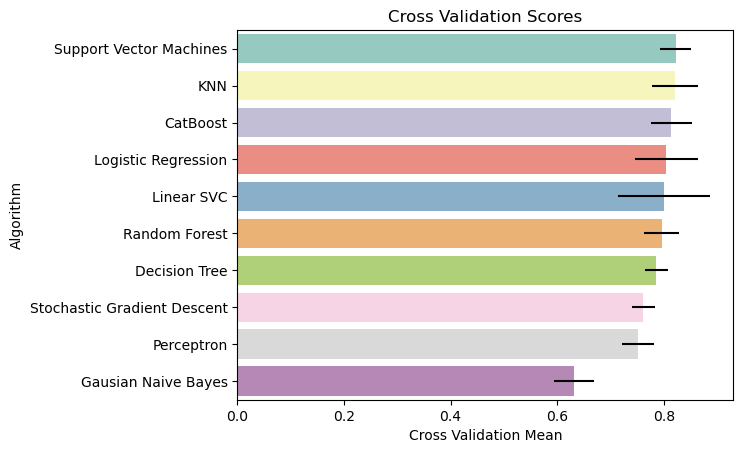

In [121]:
sns.barplot('Cross Validation Mean', 'Algorithm', data = cv_res, order = cv_res.sort_values(by = 'Cross Validation Mean', ascending = False)['Algorithm'], palette = 'Set3', **{'xerr': cv_std})
plt.ylabel('Algorithm')
plt.title('Cross Validation Scores')

SVM has the highest cross validation mean and thus we will proceed with this model

## 7.3.3 Hyperparameter tuning for SVM
Hyperparameter tuning is the process of tuning the parameters of a model.GridSearchCV is used to tune the parameters.

In [124]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 

grid.fit(X_train, Y_train) 

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.757 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.778 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.727 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.716 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.739 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.814 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.818 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.784 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.761 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.818 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.718 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.784 total time=   0.0s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.830 total time=   0.0s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.780 total time=   0.0s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.795 total time=   0.0s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.801 total time=   0.0s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.784 total time=   0.0s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.807 total time=   0.0s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.831 total time=   0.0s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.835 total time=   0.0s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.830 total time=   0.0s
[CV 4/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.784 total time=   0.1s
[CV 5/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.858 total time=   0.1s
[CV 1/5] END ...C=1000, gamm

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [125]:
print('Best parameters: ',grid.best_params_)
print('Best estimator: ',grid.best_estimator_)

Best parameters:  {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Best estimator:  SVC(C=100, gamma=0.01)


In [126]:
# Training accuracy

svc = SVC(C = 100, gamma = 0.01, kernel = 'rbf')
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

83.54

In [129]:
# Mean cross validation score

cross_val_score(svc, X_train, Y_train, scoring = 'accuracy', cv = 10).mean()

0.831996935648621

In [130]:
#survival prediction by support vector classifier
Y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [131]:
len(Y_pred)

418

# 8. Preparaing Data for submission

In [132]:
ss.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [133]:
ss.shape

(418, 2)

In [134]:
#create submission df
submit = pd.DataFrame({'PassengerId':test['PassengerId'],'Survived':Y_pred})
submit.head()

,PassengerId,Survived
881,892,0
882,893,0
883,894,0
884,895,0
885,896,1


In [135]:
submit.shape

(418, 2)

In [136]:
#create and save csv file
submit.to_csv('svm_titanic.csv', index = False)